# CUSTOMER CHURN PREDICTION

# 1.  Introduction  <a class="anchor" name="Intro">
    
Customer churn is the measure used to quantify the number of customers that cancel a companies product or service over time, it is key to understanding customer retention. It is an important metric when it comes to company growth forecasting, managing customer dissatisfaction and cost saving, as it can be costly to acquire new customers.

## 1.1 Table of Contents

[1. Introduction](#Intro) <br>
[2. EDA](#task1) <br>
$\;\;\;\;$[2.1. Univariate analysis](#UnivariateAnalysis) <br>
$\;\;\;\;$[2.1. Summary of Univariate analysis](#SumUnivariate) <br>
$\;\;\;\;$[2.2. Bivariate analysis](#BivariateAnalysis) <br>
$\;\;\;\;$[2.2. Summary of Bivariate analysis](#SumBivariate) <br>
$\;\;\;\;$[2.2. Multivariate analysis](#MultivariateAnalysis) <br>
$\;\;\;\;$[2.2. Summary of Multivariate analysis](#SumMultivariate) <br>
$\;\;\;\;$[2.3. More](#More) <br>
$\;\;\;\;$[2.4. Summary](#Summary) <br>
[3. Model Development](#MD) <br>
$\;\;\;\;$[3.1 Model 1 - GLM](#DevGLM) <br>
$\;\;\;\;$[3.2 Model - LDA](#DevLDA) <br>
[4. Model Scoring on Test Data](#MScore) <br>
[5. Model Interpretation and Inference](#MInterp) <br>
[6. Variable Importance](#VarImp) <br>
[7. Marketing Suggestions](#MarktSugst) <br>
[8. Conclusion](#Conclusion) <br>
[9. References](#Ref) <br>

# 2.  Problem Statement  <a class="anchor" name="Problem">

Two datasets are provided to explore, develop, train and test models. There are sixteen anonymized features in the provided dataset and one response variable (named 'labels') which indicates churn (1) or no churn (0) for each observation. The aim is to build a statistical model which will accurately predict when an insurance company is about to lose their customer.

Data Source: https://www.kaggle.com/mukulsingh/insurance-churn-prediction

In [69]:
# Subpress warnings before loading lbraries
options(warn=-1)

#import necessary libraries
library(psych)
library(ggplot2)
library(reshape2)
library(OneR)
library(RColorBrewer)
library(corrplot)
library(gridExtra)
library(tree)
library(rpart)
library(iml)
library(boot)
library(MASS)
library(glmnet)
library(ROCR)
library(caret)
library(stats)
library(vcd)
library(car)

Read in the test and train datasets.

In [2]:
# laod test dataset
test <- read.csv(file = 'testSet.csv',stringsAsFactors = TRUE)

# load train dataset
train <-  read.csv(file = 'trainSet.csv',stringsAsFactors = TRUE)

## 3. Exploratory Data Analysis (EDA)<a class="anchor" name="task1">

#### Aim of Exploratory Data Analysis (EDA):

1. Explore individual variables, their characteristics such as spread, variance, distribution etc.
2. Identify important features which have a relationship with our label, and how they interact.
3. Explore the qualities of the relationships to identify which models will give strongest results, and how we can transform the data to aid with learning.
4. Identify features with no relationship and exclude them from our models, for improved efficiency and reduced over fitting.
5. Identify features which strongly correlate with one another, to eliminate duplicate information. 
6. Build effective models which are supported by our exploration.

First look at the data

In [3]:
# show the first rows
head(train)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1.5127910,-0.2434605,0.1434182,2.01858846,0.07622994,-0.4114531,-0.2519404,1,1,1,0,1,0,0,0,3,0
2,-1.5007763,-0.2125875,1.2248391,-0.15984112,-0.56935064,-0.4114531,-0.2519404,8,2,1,0,0,0,0,8,3,0
3,0.9477471,0.5812426,-0.3372133,0.77987360,-0.56935064,-0.4114531,-0.2519404,0,2,1,0,0,0,2,8,3,0
4,-0.8415585,-0.2217837,0.5038918,-0.37729577,0.39902023,-0.4114531,-0.2519404,9,1,1,0,0,0,0,1,3,0
5,-0.5590365,-0.5922597,-1.1783185,-0.41612696,-0.56935064,-0.4114531,-0.2519404,1,2,1,0,1,0,0,8,3,0
6,0.9477471,-0.4654833,-0.5775291,0.08867847,-0.24656035,2.2551433,2.3528870,4,2,2,1,1,0,0,8,0,0


Check the data types.

In [4]:
# show training the data structure
str(train)

'data.frame':	27126 obs. of  17 variables:
 $ feature_0 : num  1.513 -1.501 0.948 -0.842 -0.559 ...
 $ feature_1 : num  -0.243 -0.213 0.581 -0.222 -0.592 ...
 $ feature_2 : num  0.143 1.225 -0.337 0.504 -1.178 ...
 $ feature_3 : num  2.019 -0.16 0.78 -0.377 -0.416 ...
 $ feature_4 : num  0.0762 -0.5694 -0.5694 0.399 -0.5694 ...
 $ feature_5 : num  -0.411 -0.411 -0.411 -0.411 -0.411 ...
 $ feature_6 : num  -0.252 -0.252 -0.252 -0.252 -0.252 ...
 $ feature_7 : int  1 8 0 9 1 4 7 6 6 9 ...
 $ feature_8 : int  1 2 2 1 2 2 1 1 1 1 ...
 $ feature_9 : int  1 1 1 1 1 2 1 2 1 3 ...
 $ feature_10: int  0 0 0 0 0 1 0 0 0 0 ...
 $ feature_11: int  1 0 0 0 1 1 0 1 1 1 ...
 $ feature_12: int  0 0 0 0 0 0 0 1 1 0 ...
 $ feature_13: int  0 0 2 0 0 0 0 2 0 0 ...
 $ feature_14: int  0 8 8 1 8 8 1 6 5 9 ...
 $ feature_15: int  3 3 3 3 3 0 3 3 3 3 ...
 $ labels    : int  0 0 0 0 0 0 0 0 0 0 ...


We already know the 'labels' are factors, feature 7-15 probably are as well. It's important to know which features are categoric/discrete, because it will influence some of the statistical measurements we perform to analyse relationships, such as whether or not to use chi-squared test in bivariate analysis.

Below shows the number of unique values in each feature:

In [5]:
#Show the unique values in each feature
print(apply(train,2,function(x) length(unique(x))))

 feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6 
        77       5901         31       1403         46        499         35 
 feature_7  feature_8  feature_9 feature_10 feature_11 feature_12 feature_13 
        12          3          4          2          2          2          3 
feature_14 feature_15     labels 
        12          4          2 


This adds to our evidence that most variables were categoric before being numerically encoded (for de-identification).

We can also  check what the discrete values are. If there is a set of numeric integers from a condensed range, that will further our case for assuming they are categoric/qualitative.

In [6]:
#Show the unique values in the features we think could be qualitative
apply(train[,8:17],2,function(x) sort(unique(x)))

$feature_7
 [1]  0  1  2  3  4  5  6  7  8  9 10 11

$feature_8
[1] 0 1 2

$feature_9
[1] 0 1 2 3

$feature_10
[1] 0 1

$feature_11
[1] 0 1

$feature_12
[1] 0 1

$feature_13
[1] 0 1 2

$feature_14
 [1]  0  1  2  3  4  5  6  7  8  9 10 11

$feature_15
[1] 0 1 2 3

$labels
[1] 0 1

So we will assume features 7-15, and the labels are categoric.

It also appears that more than just our integer data is discrete, for example, feature 2 despite containing decimals, only takes 31 unique values. By plotting them on a number line, we can see the exact nature of the remaining features (features 0-6).

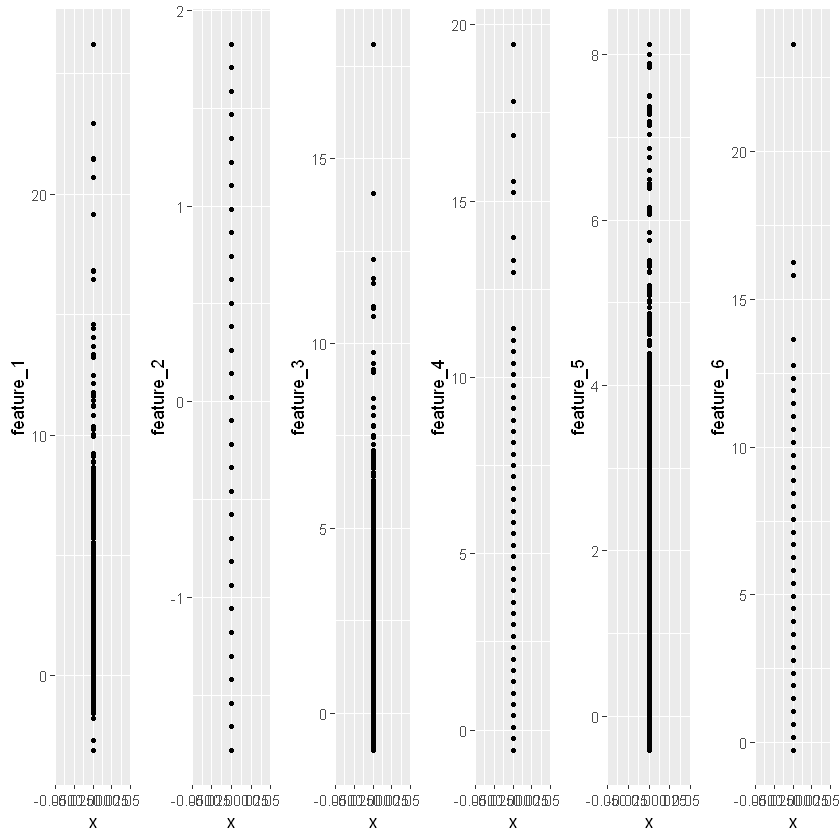

In [7]:
p0 <- ggplot(train, aes(x=0, y=feature_0)) +
  geom_point(size = 1)

p1 <- ggplot(train, aes(x=0, y=feature_1)) +
  geom_point(size = 1)

p2 <- ggplot(train, aes(x=0, y=feature_2)) +
  geom_point(size = 1)

p3 <- ggplot(train, aes(x=0, y=feature_3)) +
  geom_point(size = 1)

p4 <- ggplot(train, aes(x=0, y=feature_4)) +
  geom_point(size = 1)

p5 <- ggplot(train, aes(x=0, y=feature_5)) +
  geom_point(size = 1)

p6 <- ggplot(train, aes(x=0, y=feature_6)) +
  geom_point(size = 1)

grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 6)

It appears that feature 2, 4 and 6 are discrete, but it would be unusual to encode categoric data in a decimal scale. We'll explore these variables with statistical tools for both continuous and discrete data and treat them in which ever way performs best in the end.

It's not known which variables are ordinal and nominal, that is, whether to imply the natural order of the assigned integers has meaning or not. Non-ordinal variables will need to be converted to factors or one-hot-encoded if there is no specific order to their integer assignment. Currently we only know that the label is a factor.

In [8]:
#change label and features 7-15 data type to factor in train dataset
#train[,8:17] <- data.frame(lapply(train[,8:17], as.factor))
train$labels <- as.factor(train$labels)

#change label and features 7-15 data type to factor in test dataset
#test[,8:17] <- data.frame(lapply(test[,8:17], as.factor))
test$labels <- as.factor(test$labels)
                     
#always check your work - looks good.
str(train)

'data.frame':	27126 obs. of  17 variables:
 $ feature_0 : num  1.513 -1.501 0.948 -0.842 -0.559 ...
 $ feature_1 : num  -0.243 -0.213 0.581 -0.222 -0.592 ...
 $ feature_2 : num  0.143 1.225 -0.337 0.504 -1.178 ...
 $ feature_3 : num  2.019 -0.16 0.78 -0.377 -0.416 ...
 $ feature_4 : num  0.0762 -0.5694 -0.5694 0.399 -0.5694 ...
 $ feature_5 : num  -0.411 -0.411 -0.411 -0.411 -0.411 ...
 $ feature_6 : num  -0.252 -0.252 -0.252 -0.252 -0.252 ...
 $ feature_7 : int  1 8 0 9 1 4 7 6 6 9 ...
 $ feature_8 : int  1 2 2 1 2 2 1 1 1 1 ...
 $ feature_9 : int  1 1 1 1 1 2 1 2 1 3 ...
 $ feature_10: int  0 0 0 0 0 1 0 0 0 0 ...
 $ feature_11: int  1 0 0 0 1 1 0 1 1 1 ...
 $ feature_12: int  0 0 0 0 0 0 0 1 1 0 ...
 $ feature_13: int  0 0 2 0 0 0 0 2 0 0 ...
 $ feature_14: int  0 8 8 1 8 8 1 6 5 9 ...
 $ feature_15: int  3 3 3 3 3 0 3 3 3 3 ...
 $ labels    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


The proportion of data provided for testing versus training:

In [9]:
# get the dimentions of each dataset and return the proportion of data in the training dataset
cat("The ratio of testing to training data: ", round(dim(test)[1] / (dim(test)[1] + dim(train)[1]),3))

The ratio of testing to training data:  0.2

## 3.1. Univariate Analysis <a class="anchor" name="UnivariateAnalysis"></a>

How is the response variable distributed? Is it imbalanced? Is it biased?

Percentage rate of churn: 11.73 %

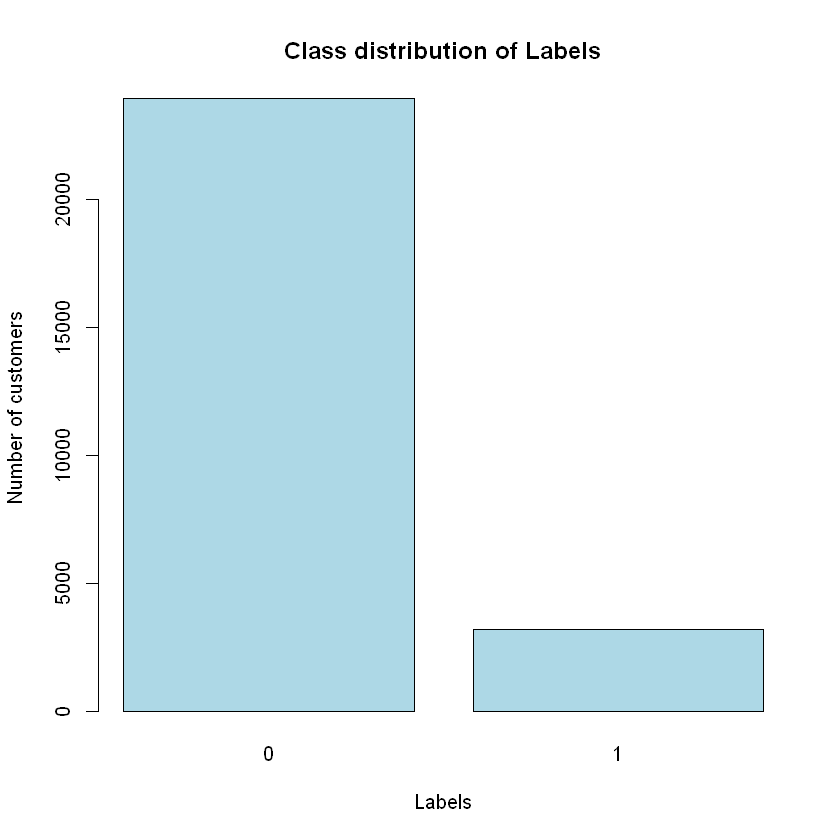

In [10]:
# produce a bar chart showing how many observations in our label data have their class equal to 1 or 0.
barplot(table(train$labels), xlab = "Labels", ylab = "Number of customers", main = "Class distribution of Labels", col = "lightblue")

# imbalance as a ratio
pc <- round(table(train$labels)[2] / length(train$labels) * 100, 2)
cat('Percentage rate of churn:', pc, '%')



The class distribution in the label is very imbalanced, this will affect some learning algorithms and/or model evaluation metrics later.

#### Detailed descriptive statistics for continuous data:

In [11]:
# return summary statistics for the train dataset
round(describe(train[,1:16]), 3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
feature_0,1,27126,-0.005,1.000,-0.182,-0.068,0.977,-2.160,5.091,7.251,0.677,0.292,0.006
feature_1,2,27126,0.001,0.986,-0.297,-0.193,0.223,-3.081,26.223,29.304,7.503,103.612,0.006
feature_2,3,27126,0.004,1.000,0.023,-0.010,1.247,-1.779,1.826,3.605,0.088,-1.058,0.006
feature_3,4,27126,-0.002,0.997,-0.307,-0.186,0.530,-1.002,18.095,19.097,3.157,18.827,0.006
feature_4,5,27126,0.000,1.009,-0.247,-0.210,0.479,-0.569,19.444,20.013,5.101,44.119,0.006
feature_5,6,27126,-0.003,0.997,-0.411,-0.285,0.000,-0.411,8.128,8.539,2.639,7.088,0.006
feature_6,7,27126,-0.009,0.795,-0.252,-0.197,0.000,-0.252,23.626,23.878,7.360,96.290,0.005
feature_7,8,27126,4.336,3.273,4.000,4.242,4.448,0.000,11.000,11.000,0.268,-1.265,0.020
feature_8,9,27126,1.170,0.605,1.000,1.213,0.000,0.000,2.000,2.000,-0.098,-0.423,0.004


Some initial findings from summary statistics:
- There is no **Missing Data**
- Features 7 & 14 have the **highest variance**, they could be very useful features. On the flip side, features with the **lowest variance** are 12, 11, and 10, we might consider filtering those out of our models during feature selection.
- There has been no **feature scaling** yet (e.g. min-max scaling), we may need to do this for some types of statistical model
- **Expected Data Characteristics:** Given that we don't have any particular knowledge about each feature, we cannot comment on the expected or unexpected characteristics of each variable. Only that our response variable has two classes, 0 and 1 which represent churn and no churn as expected.

#### Descriptive statistics for discrete data:

In [12]:
summary(data.frame(lapply(test[,8:17], as.factor)), maxsum = 12)

# table and prop.table information is way to extensive to interpret here
#table(test[,8:16])

 feature_7 feature_8 feature_9 feature_10 feature_11 feature_12 feature_13
 0 : 806   0: 788    0:1014    0:6652     0:2925     0:5680     0:4361    
 1 :1432   1:4021    1:3527    1: 130     1:3857     1:1102     1: 428    
 2 : 220   2:1973    2:1946                                     2:1993    
 3 : 182             3: 295                                               
 4 :1408                                                                  
 5 : 354                                                                  
 6 : 225                                                                  
 7 : 640                                                                  
 8 : 135                                                                  
 9 :1160                                                                  
 10: 179                                                                  
 11:  41                                                                  
 feature_14 feature_15 la

Qualitative data ranges from 2 to 12 categories. None are evenly distributed, while many have a clear preference towards one class over the others, such as feature_13 which has 17,617 in class 0 and less than 10,000 observations in the other two classes (1 & 2) combined.

Histograms and Density Plots for our continuous data:

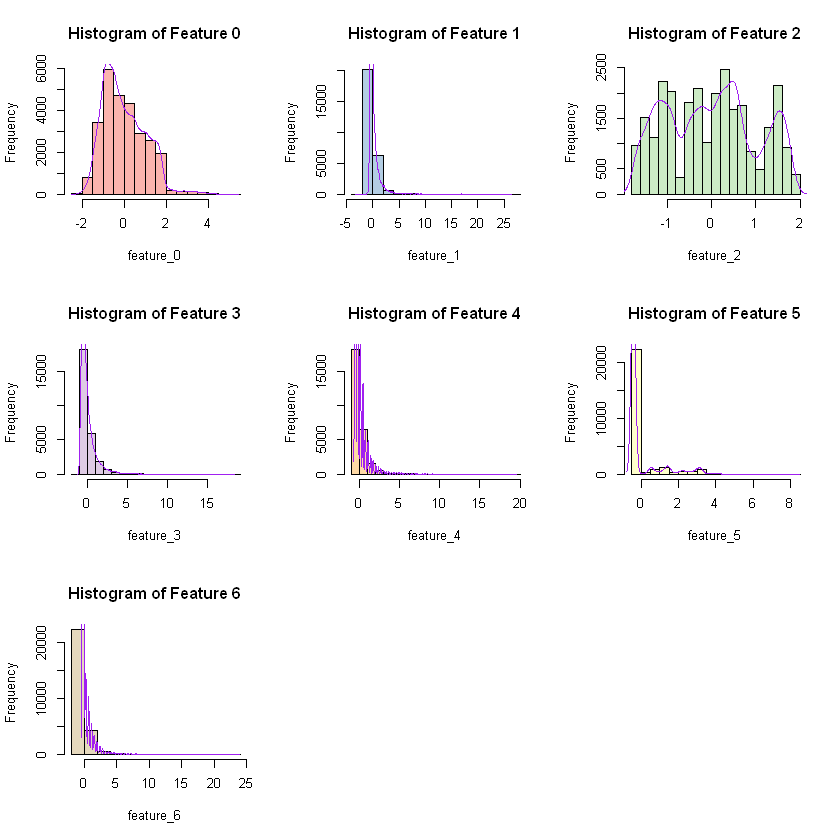

In [13]:
#increase scale size of jupyter plots for some very detailed ones momentarily.
options(jupyter.plot_scale=1) 

# Histogram for features 0 to 6
par(mfrow = c(3,3))
for (i in 1:7 ) {
    h <- hist(train[,i], plot=FALSE)
    plot(h, main=paste("Histogram of Feature", i-1), xlab = names(train[i]), col = brewer.pal(8, name = "Pastel1")[i])
    d <- density(train[,i])
    lines(x = d$x, y = d$y * length(train[,i]) * diff(h$breaks)[1], col = "purple", lwd = 1.5)
}

A mix of left skewed (feature 0) and exponential (features 1, 3, 4 & 6) features are seen here.

Bar chart exploration for our (assumed) qualitative data:

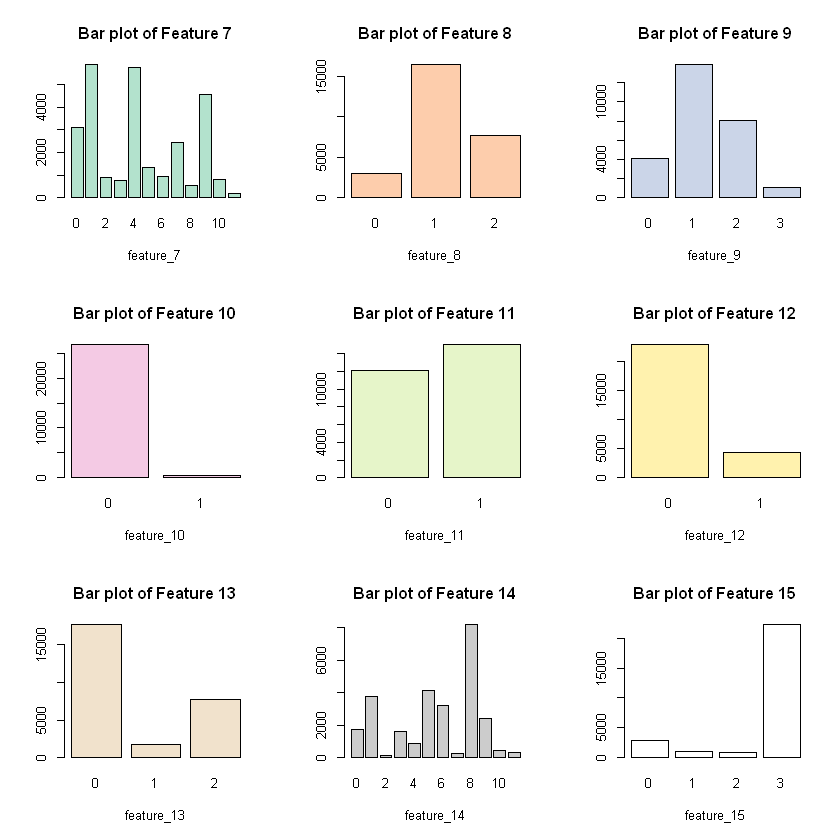

In [14]:
# Bar chart for features 7 to 15
par(mfrow = c(3,3))
for (i in 8:16 ) {
        barplot(table(train[,i]), xlab = names(train[i]), main = paste("Bar plot of Feature", i-1), col = brewer.pal(8, name = "Pastel2")[i-7])
}

As found earlier, features 10, 11, 12 and the label are binomial. Features 10 & 12 are primarily distributed at zero. Feature 11 on the other hand is a little more evenly distributed.

The rest of our features are multinomial with little patterning to them.

## 3.2. Summary of Univariate Analysis <a class="anchor" name="SumUnivariate"></a>

### Variance 
Features with the **low variance** are unlikely to contribute much value to any model, such as features 12, 11, and 10, it's likely they will be filtered out during **feature selection**.

### Quantitative vs Qualitative Variables:

The distinction between quantitative vs qualitative data is important to establish early so that we may choose appropriate visual exploration methods and determine whether **dummy encoding** is needed for specific learning algorithms later on.

We have identified that features 0-6 qualitative as they are **continuous**, of those 2,4 & 6 appear to be **discretely** distributed on the decimal scale. It's assumed that features 7-15 are **categoric**, however we don't know if there is any logical order or rank in their integer assignment, therefore their erratic distributions (notably in feature 7, 14 & 15) could be an indication that they are **nominal** (have no order or rank).

### Distributions:
Other notable observations include that feature 0, 1, 3, 4 & 6 are all skewed. Feature 5 looks interesting, it could be skewed unimodal, bimodal or something else. Feature 2 is fairly uniformly distributed (possibly 7 and 11 too). Many of the integer features (7 and above) show a clear class imbalance (particularly 10, 12 and 15).

### Labels class imbalance
The **response variable is highly imbalanced**. The majority class (0 = No Churn) is very dominant here and so we expect that some learning algorithms will significantly favour this class for positive prediction unless we compensate. **Resampling**, shifting **probability thresholds** and appropriate **cost function** selection should be considered

### Other notes
**Feature scaling** has not been completed on this dataset, some algorithms might need this. There is **no missing data** in any features and since we don't have any particular knowledge about each feature, we cannot comment more generally on the expected or unexpected characteristics of each variable, such as the range of values and outliers.

## 3.3. Bivariate Analysis <a class="anchor" name="BivariateAnalysis"></a>

Checking for **colinearity**:

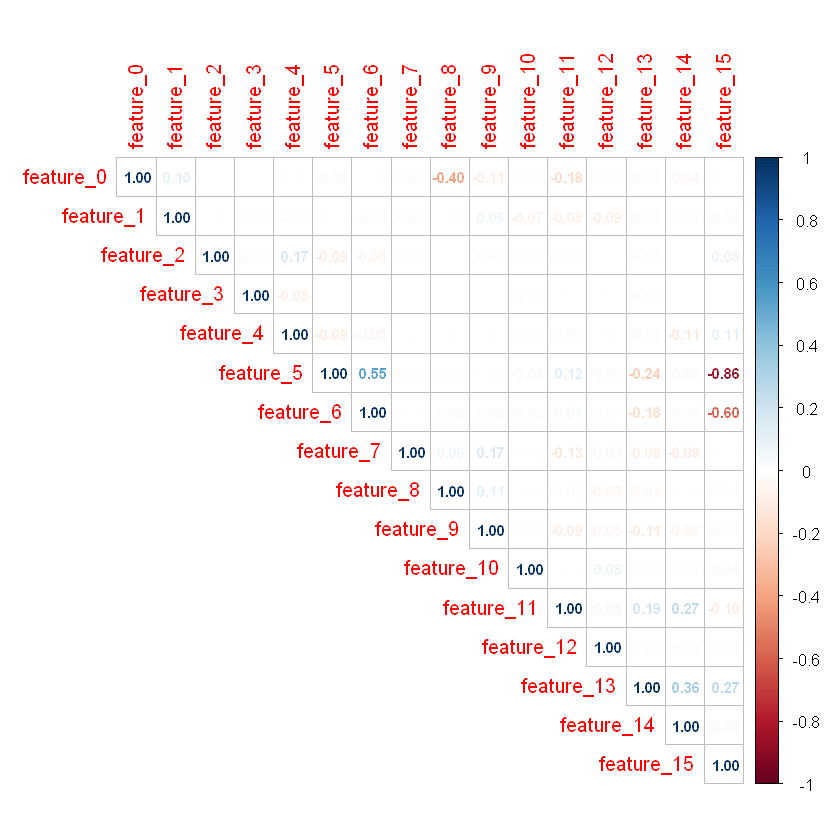

In [15]:
# exclude our label from correlation data since it is a factor
cor <- cor(train[-17])

# plot correlations
corrplot(cor, method = 'number', type = 'upper',number.cex=0.75)

Feature 15 and 5 are highly negatively correlated, 15 and 6 are somewhat similar too. Features 5 & 6 are positively correlated with each other, which explains their similar relationship with 15. **Collinearity** in these features will cause problems in regression models.

Plotting the pair wise relationships in our data will give us a quick idea of whether there are any important **non-linear relationships**:

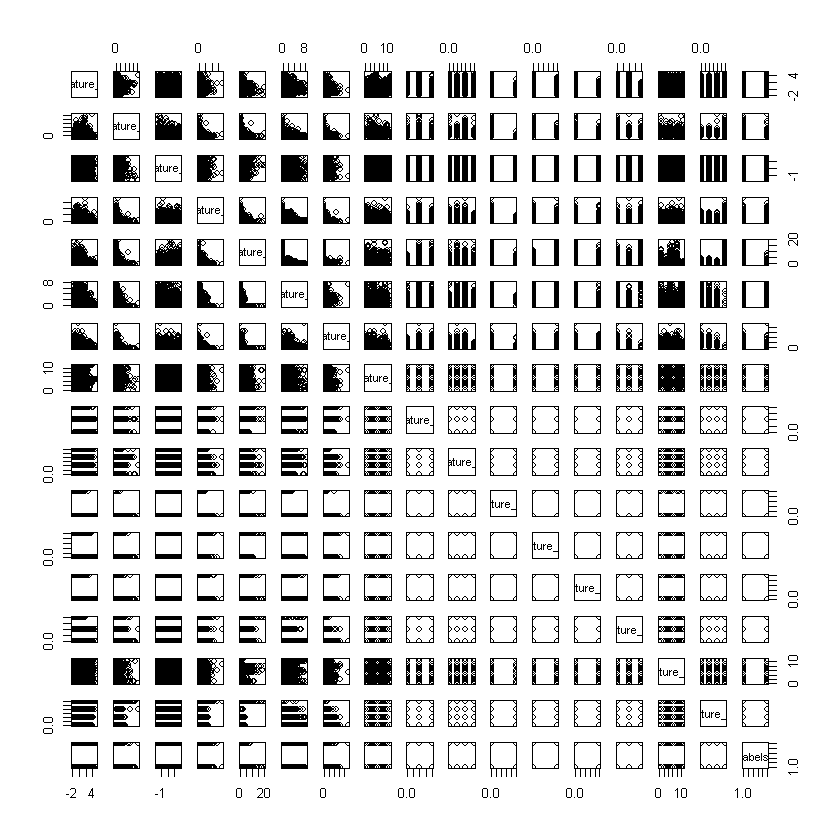

In [16]:
pairs(train)

There are no other descernable realtionships other than those we already established through correlation.

Correlation between the label and predictors: 

In [17]:
cor(train[,-17], as.numeric(train[,17])) 

feature_0,0.01550229
feature_1,0.05064085
feature_2,-0.02975611
feature_3,0.39008974
feature_4,-0.07615220
feature_5,0.11057683
feature_6,0.11904202
feature_7,0.03671097
feature_8,0.04254066
feature_9,0.06883864
feature_10,-0.02411465


It appears that feature 3 (cor = 0.39) will be our most important predictor. It stands out above all other features with more than twice the correlation coefficient of any other.

### Comparing continuous variables against the categoric label:

Side by side box plots are ideal for comparing the continuous variables against our categoric response variable (labels). Many outliers have been deliberately removed with boxplots rescaled, as it was difficult to see the main quantiles of the distributions.

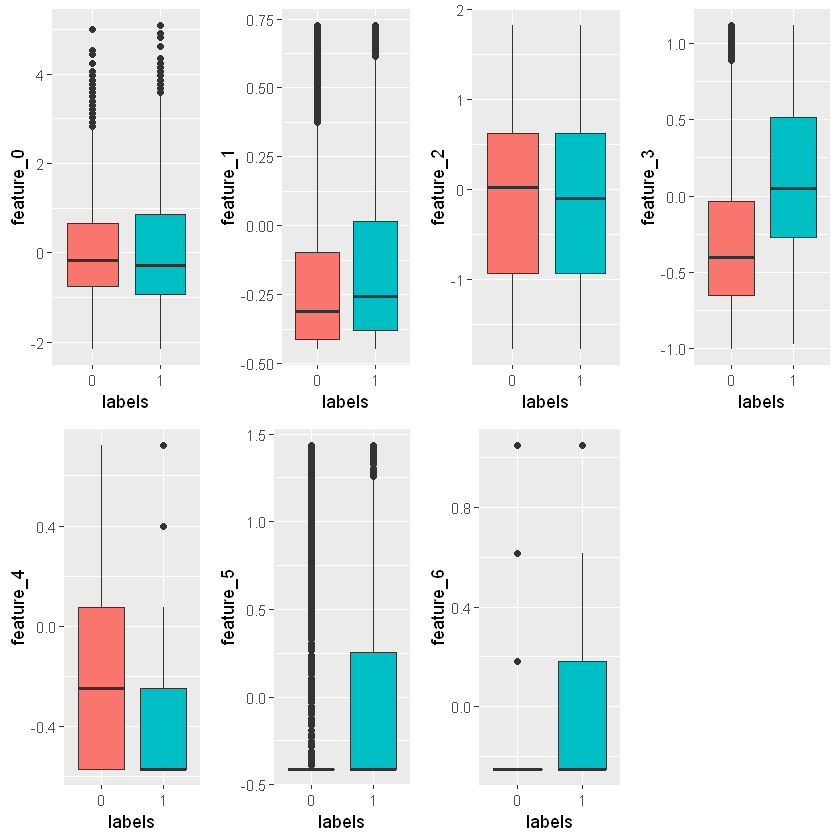

In [18]:
p1 <- ggplot(train, aes(x=factor(labels), y=train[,1], fill=factor(labels))) + 
          geom_boxplot()+
          #scale_y_continuous(limits = c(quantile(train[,1], c(0.1, 0.9))[1], quantile(train[,1], c(0.1, 0.9))[2]))+
          labs(x = "labels",y = names(train)[1]) +
          guides(fill="none")

p2 <- ggplot(train, aes(x=factor(labels), y=train[,2], fill=factor(labels))) + 
          geom_boxplot()+
          scale_y_continuous(limits = c(quantile(train[,2],c(0.1, 0.9))[1], quantile(train[,2], c(0.1, 0.9))[2]))+
          labs(x = "labels",y = names(train)[2]) +
          guides(fill="none")

p3 <- ggplot(train, aes(x=factor(labels), y=train[,3], fill=factor(labels))) + 
          geom_boxplot()+
          #scale_y_continuous(limits = c(quantile(train[,3], c(0.1, 0.9))[1], quantile(train[,3], c(0.1, 0.9))[2]))+
          labs(x = "labels",y = names(train)[3]) +
          guides(fill="none")

p4 <- ggplot(train, aes(x=factor(labels), y=train[,4], fill=factor(labels))) + 
          geom_boxplot()+
          scale_y_continuous(limits = c(quantile(train[,4], c(0, 0.9))[1], quantile(train[,4], c(0, 0.9))[2]))+
          labs(x = "labels",y = names(train)[4]) +
          guides(fill="none")

p5 <- ggplot(train, aes(x=factor(labels), y=train[,5], fill=factor(labels))) + 
          geom_boxplot()+
          scale_y_continuous(limits = c(quantile(train[,5], c(0, 0.9))[1], quantile(train[,5], c(0, 0.9))[2]))+
          labs(x = "labels",y = names(train)[5]) +
          guides(fill="none")

p6 <- ggplot(train, aes(x=factor(labels), y=train[,6], fill=factor(labels))) + 
          geom_boxplot()+
          scale_y_continuous(limits = c(quantile(train[,6], c(0.1, 0.9))[1], quantile(train[,6], c(0.1, 0.9))[2]))+
          labs(x = "labels",y = names(train)[6]) +
          guides(fill="none")

p7 <- ggplot(train, aes(x=factor(labels), y=train[,7], fill=factor(labels))) + 
          geom_boxplot()+
          scale_y_continuous(limits = c(quantile(train[,7], c(0, 0.95))[1], quantile(train[,7], c(0, 0.95))[2]))+
          labs(x = "labels",y = names(train)[7]) +
          guides(fill="none")


grid.arrange(p1, p2, p3, p4, p5, p6, p7, ncol = 4)

- Features 1 & 3 exhibit **higher mean** for churn (1) compared to no churn (0). 
- Feature 0 has a **wider distribution** for churn than no churn. 
- Feature 2 has a slightly **lower mean** for churn but the same overall spread. 
- Feature 5 & 6 appear to be very similar, with the same mean but **greater spread** for churn. 
- Lastly, feature 4 has **lower mean and spread** for churn. 

These are explored in increased detail below with density plots. There are a great many potential outliers sitting outside the third quartile in all except feature 3.

We could compute a t-test to determine whether the means are significantly different, however this requires the **assumption of normal distribution**, which it isn't. Even our most normal variable - feature_0 doesn't meet this criteria, as seen in the QQ plot below.

[1]  7547 26375

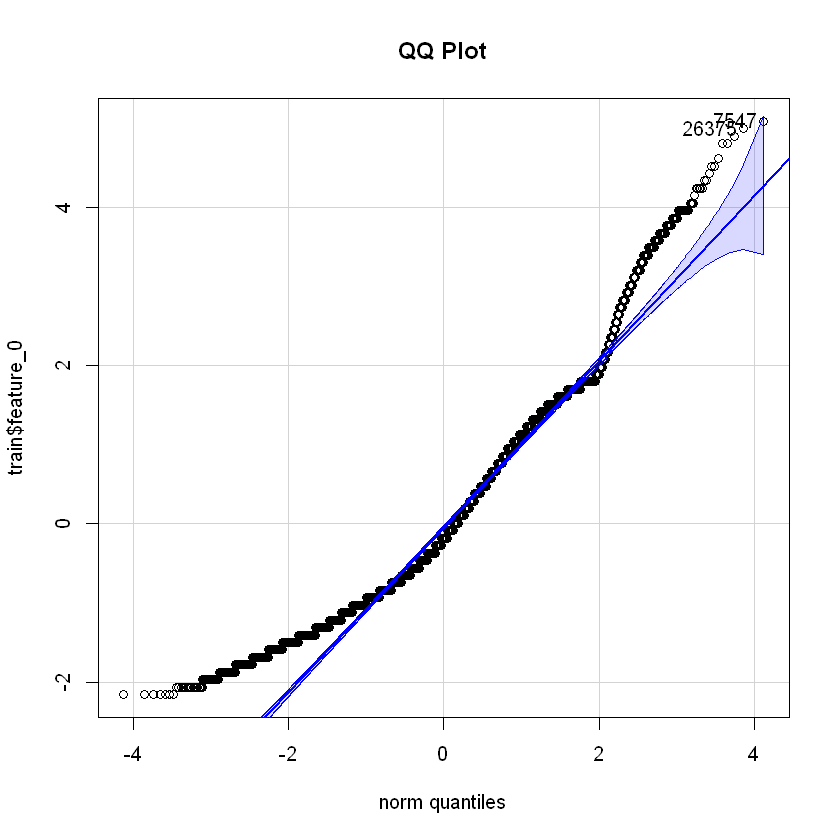

In [19]:
qqPlot(train$feature_0, main="QQ Plot", distribution="norm", envelope=.99)

Exploring density plots:

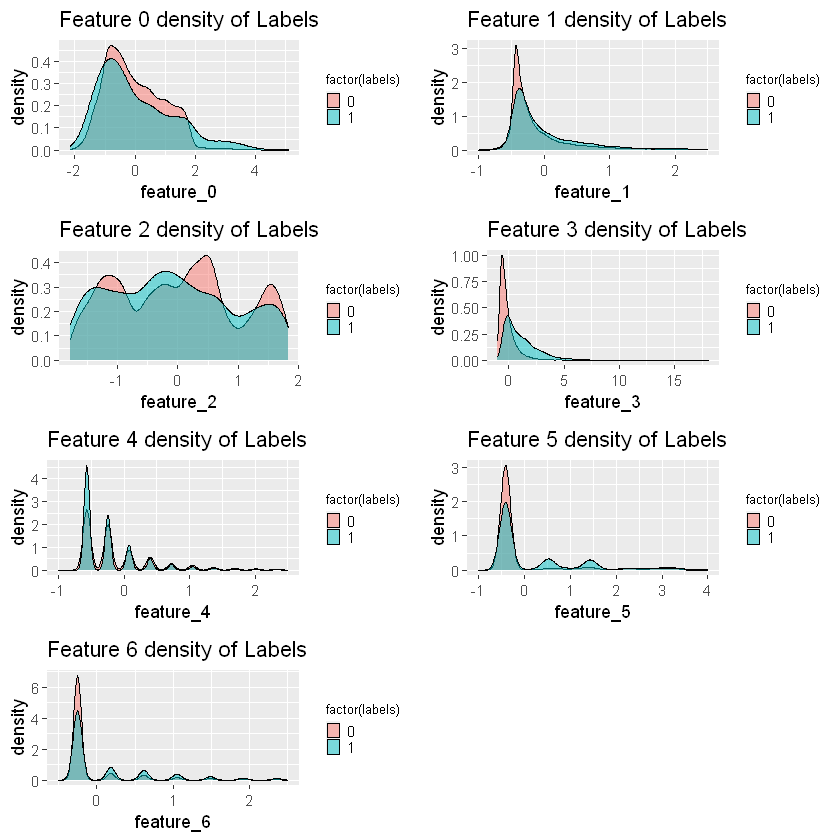

In [20]:
p1 <- ggplot(train) +
  geom_density(aes(x = feature_0, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_0') +
  ggtitle("Feature 0 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))

p2 <- ggplot(train) +
  geom_density(aes(x = feature_1, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_1') +
  ggtitle("Feature 1 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8)) +
  xlim(c(-1,2.5))

p3 <- ggplot(train) +
  geom_density(aes(x = feature_2, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_2') +
  ggtitle("Feature 2 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))

p4 <- ggplot(train) +
  geom_density(aes(x = feature_3, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_3') +
  ggtitle("Feature 3 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))

p5 <- ggplot(train) +
  geom_density(aes(x = feature_4, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_4') +
  ggtitle("Feature 4 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8)) +
  xlim(c(-1,2.5))

p6 <- ggplot(train) +
  geom_density(aes(x = feature_5, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_5') +
  ggtitle("Feature 5 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8)) +
  xlim(c(-1,4))

p7 <- ggplot(train) +
  geom_density(aes(x = feature_6, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_6') +
  ggtitle("Feature 6 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8)) +
  xlim(c(-0.5,2.5))

grid.arrange(p1, p2, p3, p4, p5, p6, p7, ncol = 2)

- The additional detail in features 2, 4,5 & 6 is interesting. 
- Features 4, 5 and 6 appear to have similar distributions for churn versus no churn, however they differ in the magnitude of their peaks - feature 4's high peak colours are the inverse of 5 & 6.
- Feature 2 is different, it has churn and no churn peaks in different places. It now appears more multimodal.

The difference in mean and spread for each label class in **features 1 & 3 remain convincing as a strong predictors**.

### Comparing two categoric variables
Bar charts are used to compare features 7-15 against their labels. Since there is substantial imbalance between the churn and no churn rates, we use a percentage scale for comparisons.

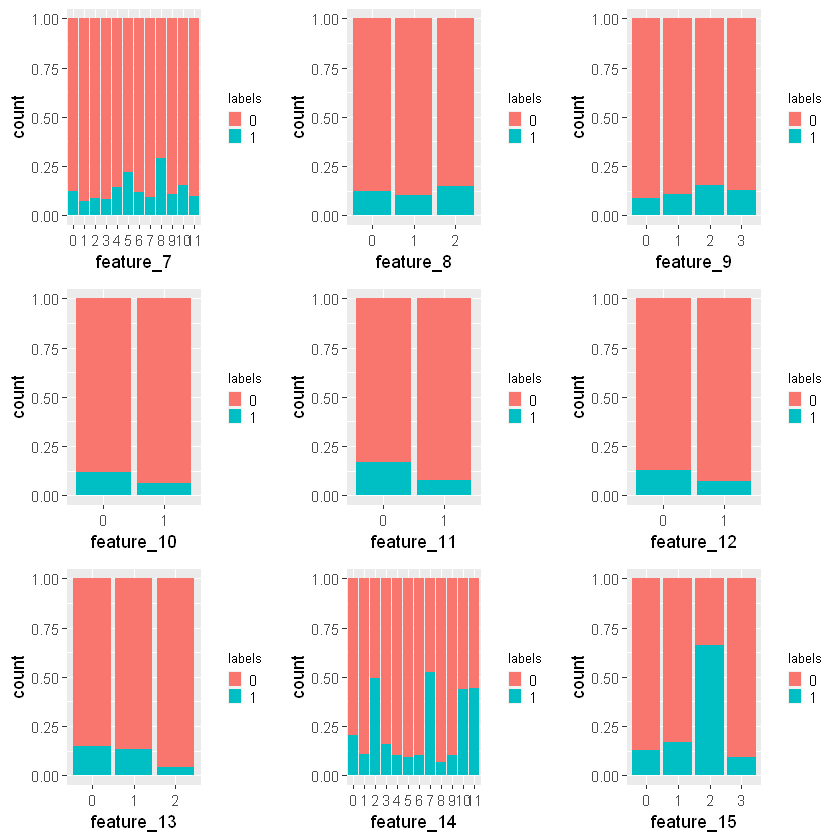

In [21]:
p7<- ggplot(train, aes(x = factor(feature_7), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_7')

p8<- ggplot(train, aes(x = factor(feature_8), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_8')

p9<- ggplot(train, aes(x = factor(feature_9), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_9')

p10<- ggplot(train, aes(x = factor(feature_10), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_10')

p11<- ggplot(train, aes(x = factor(feature_11), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_11')

p12<- ggplot(train, aes(x = factor(feature_12), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_12')

p13<- ggplot(train, aes(x = factor(feature_13), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_13')

p14<- ggplot(train, aes(x = factor(feature_14), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_14')

p15<- ggplot(train, aes(x = factor(feature_15), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_15')


grid.arrange(p7, p8, p9, p10, p11, p12, p13, p14, p15, ncol = 3)

These results show very strong motivation for treating features 7, 14 & 15 as nominal, they should be **factors** or **one hot encoded**.

The overall imbalance in this dataset's labels dictates that churn (1/blue) should be roughly around 12% of the counts. We see substantial deviation from this for some category values in feature 7, 14 and 15. These could be helpful in predicting churn. Because we see no obvious trends in the way the data is split for churn and no churn within these features, this might indicate there is no ordinal relationship between the categories and that dummy encoding would be beneficial in the modelling stage.

Chi-squared test of independence:

In [22]:
chisq.test(train$labels, train$feature_7, correct=FALSE)
chisq.test(train$labels, train$feature_8, correct=FALSE)
chisq.test(train$labels, train$feature_9, correct=FALSE)
chisq.test(train$labels, train$feature_10, correct=FALSE)
chisq.test(train$labels, train$feature_11, correct=FALSE)
chisq.test(train$labels, train$feature_12, correct=FALSE)
chisq.test(train$labels, train$feature_13, correct=FALSE)
chisq.test(train$labels, train$feature_14, correct=FALSE)
chisq.test(train$labels, train$feature_15, correct=FALSE)


	Pearson's Chi-squared test

data:  train$labels and train$feature_7
X-squared = 500.81, df = 11, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  train$labels and train$feature_8
X-squared = 115.64, df = 2, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  train$labels and train$feature_9
X-squared = 164.58, df = 3, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  train$labels and train$feature_10
X-squared = 15.774, df = 1, p-value = 7.137e-05



	Pearson's Chi-squared test

data:  train$labels and train$feature_11
X-squared = 499.68, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  train$labels and train$feature_12
X-squared = 115.01, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  train$labels and train$feature_13
X-squared = 617.63, df = 2, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  train$labels and train$feature_14
X-squared = 1788.7, df = 11, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  train$labels and train$feature_15
X-squared = 2802.7, df = 3, p-value < 2.2e-16


If we have a significance level of 0.05, we can **reject the null hypothesis, all tested features are dependent on the labels**, therefore there is a relationship between them.

## 3.4. Summary of Bivariate Analysis <a class="anchor" name="SumBivariate"></a>

### Collinearity
In this section correlation was measured between features. Feature 15 and 5 are **highly negatively correlated**, 15 and 6 are somewhat similar too. Since we feel feature 15 could be a strong categoric predictor, features 5 & 6 would likely be removed.

### Label correlation
Correlation against the label is used to identify that **feature 3 could be our most important predictor**.

### Quantitative/Numeric features
Boxplots of the numeric variables broken down by label confirms again that feature 3 has a lot of promise as a predictor. Additionally feature 1 may be of importance. Density plots reveal little extra detail that is helpful above what has been found so far. 

Boxplots also show that there are a great many potential outliers sitting outside the third quartile in all features except feature 3.

### Qualtitative/Categoric features
The bar charts of our assumed categoric data show that features 7, 14, 15 have categories which deviate from the expected 12% churn rate for some particular categories, also highlighting that they could prove very useful as predictors.

Results from the **chi-squared test of independence** show evidence that there is a relationship between categoric variables 7-14 and our label. This supports the theory that features 7-15  could be categoric.

## 3.5. Multivariate Analysis <a class="anchor" name="MultivariateAnalysis"></a>

### Analysing interactions between two continuous variables and the label:

In this section we have explored interactions between all continuous variables with colour separation of the label, only those with interactions of interest have been kept and discussed. If there is no difference of behavior seen between the churn and no churn label, the plot was removed.


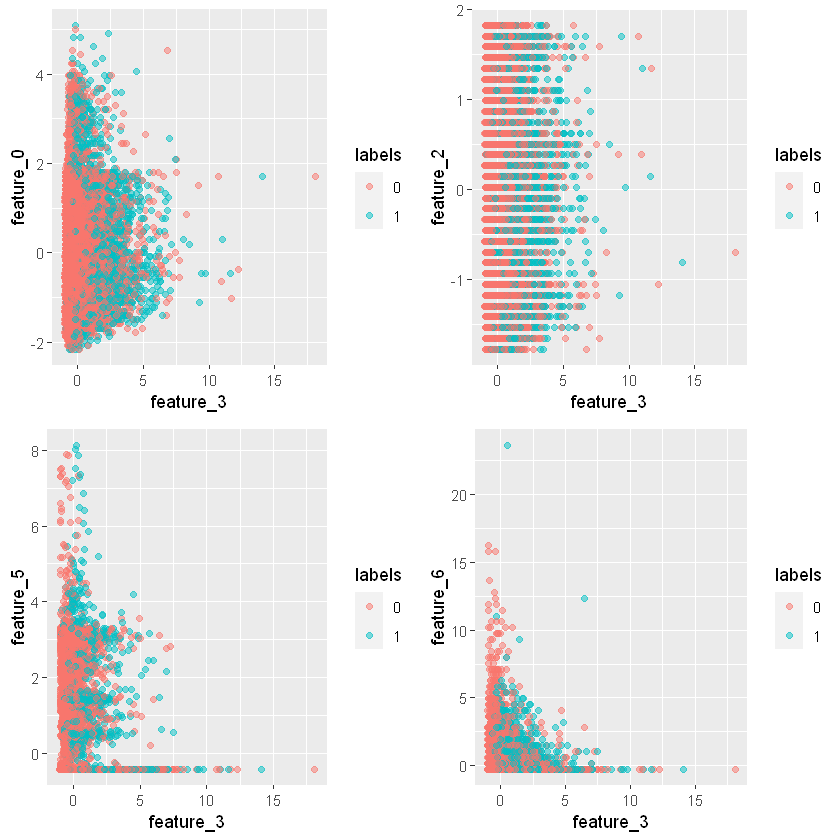

In [23]:
p0 <- ggplot(train, aes(x=feature_3, y=feature_0)) +
        geom_point(aes(colour = labels), alpha=.5)

p2 <- ggplot(train, aes(x=feature_3, y=feature_2)) +
        geom_point(aes(colour = labels), alpha=.5)

p5 <- ggplot(train, aes(x=feature_3, y=feature_5)) +
        geom_point(aes(colour = labels), alpha=.5)

p6 <- ggplot(train, aes(x=feature_3, y=feature_6)) +
        geom_point(aes(colour = labels), alpha=.5)

grid.arrange(p0, p2, p5, p6, ncol = 2)

The interaction between **most features are linearly separable**, meaning there isn't any interaction between the variables, as seen in feature 6 x 3 and feature 2 x 3, you can almost draw a line to separate the majority of churn / no churn cases. However in the case of feature 0 x 3 particularly, and feature 5 x 3 there many be some **dependence visible**.

### Analysing interactions between a continuous and discrete variable with the label:

In this section we have explored interactions between all continuous and discrete variable combinations with colour separation of the label, only those with interactions of interest have been kept and discussed. If there is no difference of behaviour seen between the churn and no churn label, the plot was removed. Also, if there was no new behaviours not already discovered during earlier exploration, the plot was removed.

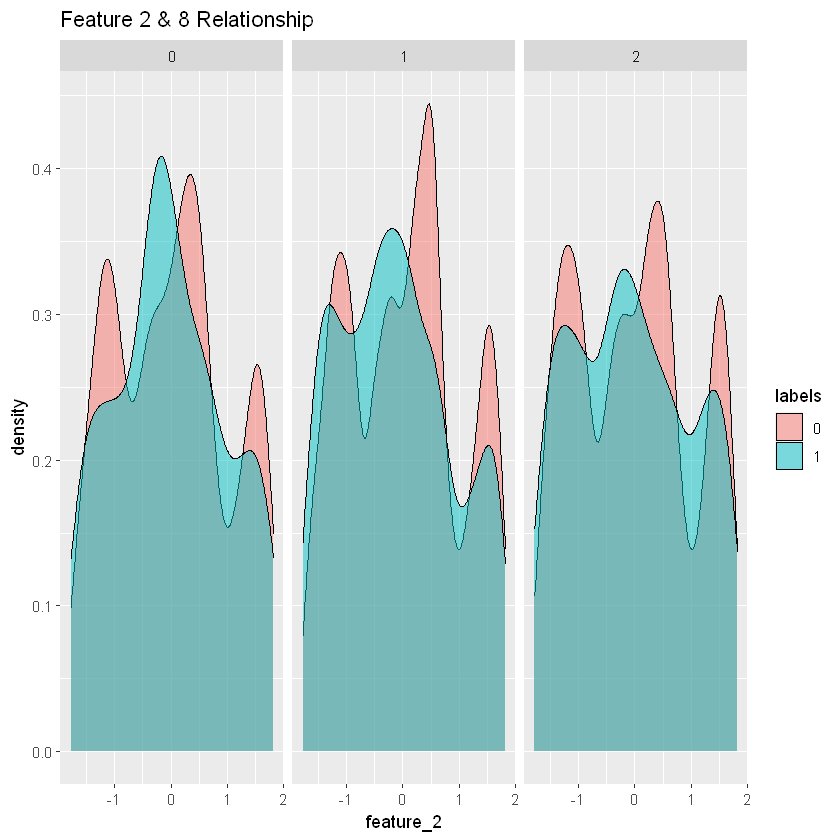

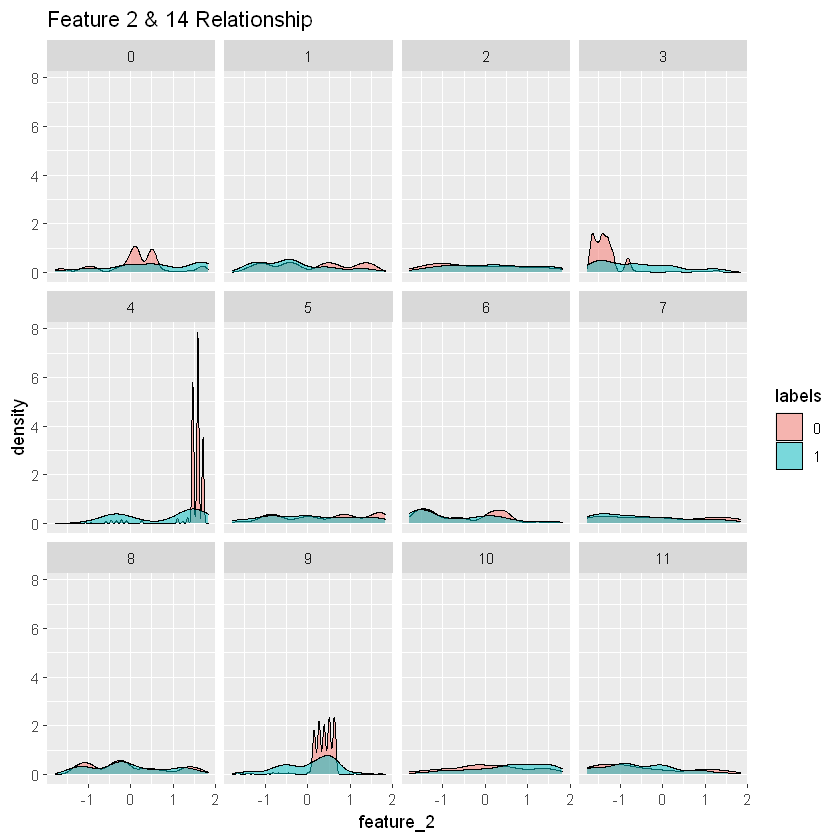

In [24]:
ggplot(aes(x=feature_2),data =train) + 
    geom_density(aes(fill = labels), alpha=.5) +
    facet_wrap(~feature_8) +
    ggtitle('Feature 2 & 8 Relationship')

ggplot(aes(x=feature_2),data =train) + 
    geom_density(aes(fill = labels), alpha=.5) +
    facet_wrap(~feature_14) +
    ggtitle('Feature 2 & 14 Relationship')

Exploration of feature 2's **interactions** with other categories was quite interesting. In general, it seems to have four or more peaks that rise and fall (independently for churn and no churn) depending on the feature and category, the interaction between feature 2 & 8 is shown as an example of this. Additionally, the interaction **between 2 and 14 is quite unique**, it is not clear how to interpret this information currently - perhaps conversion into a discrete form (such as binning into four groups) would make this variable more useful.

### Analysing interactions between two categoric variables with the label:

Mosaic plots were used to explore category interactions.

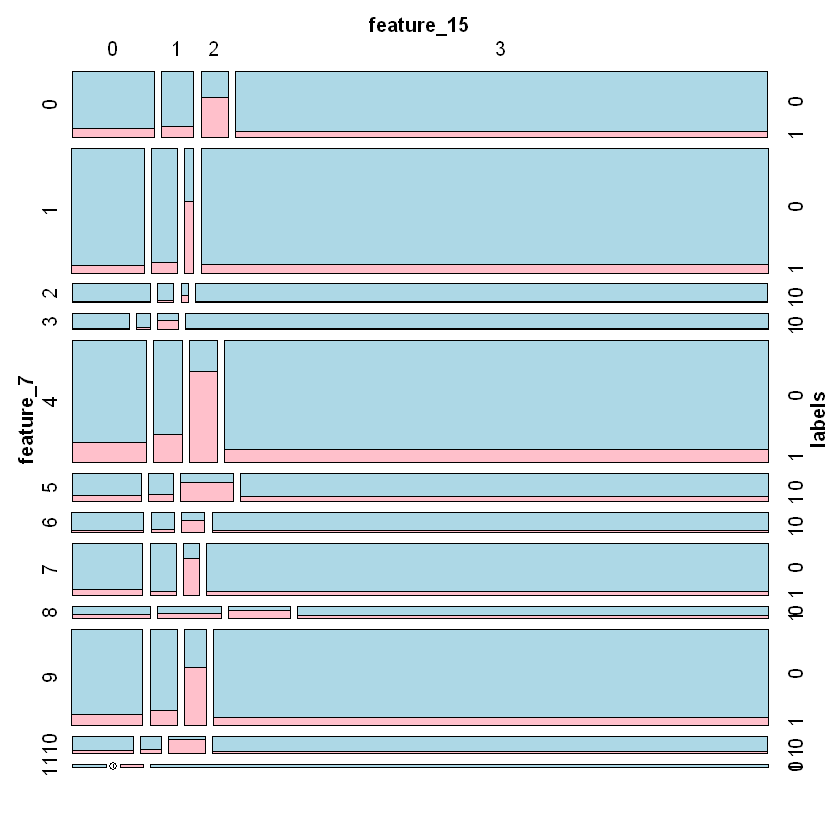

In [25]:
mosaic( ~ feature_7 + feature_15 + labels, data = train,
      highlighting = "labels", highlighting_fill = c("lightblue", "pink"))

No new discoveries were made using this method, it only confirmed what we already knew, that features 14 & 15 have categories with much higher churn rates than others.

## 3.6. Summary of Multivariate Analysis <a class="anchor" name="SumMultivariate"></a>

Numeric variable interactions again confirmed **feature 3 is significant**.

Numeric and categorical interactions showed **unusual peaks in feature 2** that appear to move independently for churn and no churn groups. As discussed earlier, this behavior seems reminiscent of categorical behavior. It's possible that **conversion into a discrete form** (such as binning into four groups) would make this variable more useful, but this is hard to justify without background knowledge of the data.

No new discoveries were made using mosaic plots to compare categoric interactions, it only confirmed what we already knew, that features 14 & 15 have some categories with much higher churn rates than others.

## 3.7. More <a class="anchor" name="More"></a>

Below a linear model is built with all variables to quantify the suitability of linear models for this problem.

In [26]:
fit.glm = glm(labels ~ ., data = train, family = binomial)
summary(fit.glm)


Call:
glm(formula = labels ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.5843  -0.4504  -0.2904  -0.1688   3.1445  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.985656   0.129631 -23.032  < 2e-16 ***
feature_0    0.057227   0.023064   2.481  0.01309 *  
feature_1    0.055672   0.017962   3.099  0.00194 ** 
feature_2   -0.048750   0.022234  -2.193  0.02834 *  
feature_3    1.005097   0.020166  49.842  < 2e-16 ***
feature_4   -0.433253   0.040982 -10.572  < 2e-16 ***
feature_5    0.374963   0.032498  11.538  < 2e-16 ***
feature_6    0.263095   0.024147  10.895  < 2e-16 ***
feature_7    0.006500   0.006922   0.939  0.34771    
feature_8    0.191809   0.039996   4.796 1.62e-06 ***
feature_9    0.206859   0.029721   6.960 3.40e-12 ***
feature_10  -0.315873   0.208964  -1.512  0.13063    
feature_11  -1.004934   0.048833 -20.579  < 2e-16 ***
feature_12  -0.711614   0.073431  -9.691  < 2e-16

Many variables appear to be **statistically significant** to this linear model. Only 10 & 7 aren't in this instance.

In [27]:
with(fit.glm, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 0

In this **chi-squared test**, the **p value** is zero, it tells us that our model fits much better than an empty model.

As we have seen earlier, there are few variables which correlate strongly with our response variable, only feature 3 stood out initially. However, the takeaway in this section is that we have more than enough information to create a linear model.

## 3.4. EDA Summary <a class="anchor" name="Summary"></a>

### Univariate
- Data types were difficult to determine given the de-identified data.
- Features with the lowest variance are 6 & 8-10, in the next section we expect to exclude these from our model on the basis of filter method of feature selection.
- Many features are highly skewed, it was not possible to normalise them using conventional methods.
- Label class imbalance was identified which will impact modeling and scoring in the next section.
- No scale normalization has been completed, this might need.

### Bivariate
- **Multicollinearity** was identified between feature 15 with features 5 & 6. Since 15 has been singled out as a potentially strong predictor, 5 & 6 are to be removed.
- Feature 3 **correlates** substantially higher than others with the label, this could be a very **important predictor**. On the other hand, 1-4, 7-10, 12, 14 & 15 scored lowest on label correlation

### Multivariate
- Variable interactions were trialled, **no substantial new findings** were made. Feature 3 interacts with 1, 4 and 6, the churn category is more bunched together than no churn in these cases. No conclusions were drawn over feature 2's interaction with other features, although it was interesting.

### Chi-Squared Test
We have plenty of variables which are **statistically significant** in testing with chi-squared on a generalized linear model.

Feature 3 again proved it's strong significance along with 5, 11 and 13. Features 14 & 15 are still significant, although they rate less highly than we gave them credit for earlier, if we experiment with factors during model development, we might find we can increase their significant that way.

### Feature filtering
We've seen that there is clearly more than enough information to create a linear model. In the following section we will deal with the multicollinearity issue between features 5, 6 & 15 and low variance in other variables.

### Choice of model
Since we've determined that linear models should be sufficient for this problem, in the following section we'll explore Logistic Regression and Linear Discriminant Analysis for modeling.

# 4. Model Development <a class="anchor" name="MD">

## 4.1 First Model - Generalised Linear Model <a class="anchor" name="DevGLM">

### Feature subset selection

We'll use the step function to select the best subset of variables for our model fit.

In [28]:
# all features aside from those we determined should be removed earlier - 5, 6, 7 & 10
fit1.glm <- glm(formula = labels ~ feature_0 + feature_1 + feature_2 + feature_3 + 
    feature_4 + feature_8 + feature_9 + feature_11 + feature_12 + feature_13 + 
    feature_14 + feature_15, family = binomial, data = train)

In [29]:
step1 <- step(fit1.glm)

Start:  AIC=14864.95
labels ~ feature_0 + feature_1 + feature_2 + feature_3 + feature_4 + 
    feature_8 + feature_9 + feature_11 + feature_12 + feature_13 + 
    feature_14 + feature_15

             Df Deviance   AIC
<none>             14839 14865
- feature_0   1    14845 14869
- feature_2   1    14847 14871
- feature_1   1    14848 14872
- feature_8   1    14865 14889
- feature_14  1    14866 14890
- feature_9   1    14886 14910
- feature_15  1    14924 14948
- feature_12  1    14954 14978
- feature_4   1    14971 14995
- feature_13  1    15247 15271
- feature_11  1    15268 15292
- feature_3   1    18039 18063


AIC is reduced from 17943 to 14731 with these features which is good, it seems that features 0, 1 & 2 are contributing very little, in fact it appears that the first eight features are doing the heavy lifting in this model.

In [30]:
fit.step1.glm <- glm(formula = labels ~ feature_0 + feature_1 + feature_2 + feature_3 + feature_4 + 
    feature_8 + feature_9 + feature_11 + feature_12 + feature_13 + 
    feature_14 + feature_15, family = binomial, data = train)

Function to evaluate our models:

In [31]:
# we're going to evaluate a few models, so we'll make a function to reuse
# this will only make predictions from the train/validation data / glm models (not glmnet)
evaluate <- function(model, true_labels) {
    probs <- predict(model, type = "response")
    pred.glm <- rep("0", length(probs))
    pred.glm[probs > 0.5] <- "1"
    #table(pred.glm, true_labels)
    std_confusion_mat <- confusionMatrix(as.factor(pred.glm), true_labels, positive="1")
    std_confusion_mat
}

Evaluation:

In [32]:
evaluate(fit.step1.glm, train$labels)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 23497  2570
         1   447   612
                                         
               Accuracy : 0.8888         
                 95% CI : (0.885, 0.8925)
    No Information Rate : 0.8827         
    P-Value [Acc > NIR] : 0.0008884      
                                         
                  Kappa : 0.2443         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.19233        
            Specificity : 0.98133        
         Pos Pred Value : 0.57790        
         Neg Pred Value : 0.90141        
             Prevalence : 0.11730        
         Detection Rate : 0.02256        
   Detection Prevalence : 0.03904        
      Balanced Accuracy : 0.58683        
                                         
       'Positive' Class : 1              
                                      

Our model appears to be performing well at 89% accuracy, the **no information rate** is high at 88% accuracy can be expected given the imbalance in the class labels. Looking at the **balanced accuracy** tells us that maybe it's not as good as we think.

We think there might be something to gain from setting features 7-9 & 13-15 as factors (7-15 were our hypothetical categoric variables, but 10, 11 & 12 aren't required to be set as factors because they are already binary). We'll add them as new features to our glm model and see whether the factor or numeric variable comes out on top after applying the step function.

In [33]:
fit.factors.glm = glm(labels ~ feature_0 + feature_1 + feature_2 + feature_3 + feature_4 + feature_11 + feature_12 + feature_13 +
                      as.factor(feature_8)+as.factor(feature_9)+as.factor(feature_14)+as.factor(feature_15), data = train, family = binomial)

In [34]:
step2 <- step(fit.factors.glm)

Start:  AIC=13121.83
labels ~ feature_0 + feature_1 + feature_2 + feature_3 + feature_4 + 
    feature_11 + feature_12 + feature_13 + as.factor(feature_8) + 
    as.factor(feature_9) + as.factor(feature_14) + as.factor(feature_15)

                        Df Deviance   AIC
- feature_0              1    13068 13122
<none>                        13066 13122
- feature_1              1    13069 13123
- feature_2              1    13070 13124
- as.factor(feature_9)   3    13102 13152
- as.factor(feature_8)   2    13102 13154
- feature_12             1    13106 13160
- feature_4              1    13124 13178
- feature_11             1    13258 13312
- feature_13             1    13347 13401
- as.factor(feature_14) 11    13723 13757
- as.factor(feature_15)  3    13991 14041
- feature_3              1    16346 16400

Step:  AIC=13121.73
labels ~ feature_1 + feature_2 + feature_3 + feature_4 + feature_11 + 
    feature_12 + feature_13 + as.factor(feature_8) + as.factor(feature_9) + 
    as.fact

We've substantially lowered the AIC again from 14865 in our last model to 13122 here. Feature 0 has been dropped as it does not contribute to lowering the AIC by the looks.

The best model and features produced by the step function is:

In [35]:
fit.step2.glm <- glm(formula = labels ~ feature_1 + feature_2 + feature_3 + feature_4 + feature_11 + 
    feature_12 + feature_13 + as.factor(feature_8) + as.factor(feature_9) + as.factor(feature_14) + 
    as.factor(feature_15), family = binomial, data = train)

In [36]:
anova(fit.glm,fit.step1.glm, fit.step2.glm, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27109,14573.44,NA,NA,NA
2,27113,14838.95,-4,-265.5108,2.960573e-56
3,27099,13067.73,14,1771.2221,0.000000e+00


This is much better, the p-value indicates this model is substantially different from the previous two models.

In [37]:
evaluate(fit.step2.glm, train$labels)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 23357  2063
         1   587  1119
                                          
               Accuracy : 0.9023          
                 95% CI : (0.8987, 0.9058)
    No Information Rate : 0.8827          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4095          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.35167         
            Specificity : 0.97548         
         Pos Pred Value : 0.65592         
         Neg Pred Value : 0.91884         
             Prevalence : 0.11730         
         Detection Rate : 0.04125         
   Detection Prevalence : 0.06289         
      Balanced Accuracy : 0.66358         
                                          
       'Positive' Class : 1               
                  

Our **accuracy**, **sensitivity** and **specificity** are all much improved. Most notably the **sensitivity has improved from 19% to 35%**.

Try a log transform of our most exponential looking skewed distributions:

In [38]:
fit.log.glm = glm(labels ~ log(feature_1+4) + feature_2 + +log(feature_3+2) + log(feature_4+1) + feature_11 + 
    feature_12 + feature_13 + as.factor(feature_8) + as.factor(feature_9) + as.factor(feature_14) + 
    as.factor(feature_15), data = train, family = binomial)

In [39]:
step3 <- step(fit.log.glm)

Start:  AIC=12580.01
labels ~ log(feature_1 + 4) + feature_2 + +log(feature_3 + 2) + 
    log(feature_4 + 1) + feature_11 + feature_12 + feature_13 + 
    as.factor(feature_8) + as.factor(feature_9) + as.factor(feature_14) + 
    as.factor(feature_15)

                        Df Deviance   AIC
<none>                        12526 12580
- feature_2              1    12532 12584
- log(feature_1 + 4)     1    12534 12586
- as.factor(feature_9)   3    12563 12611
- as.factor(feature_8)   2    12562 12612
- feature_12             1    12563 12615
- log(feature_4 + 1)     1    12592 12644
- feature_11             1    12718 12770
- feature_13             1    12784 12836
- as.factor(feature_14) 11    13185 13217
- as.factor(feature_15)  3    13438 13486
- log(feature_3 + 2)     1    16334 16386


The AIC is once again decreased, so our model is still improving, 13122 down to 12580. Feature 1 & 12 are really not contributing to this model they should be removed.

Best model from step3:

In [40]:
fit.step3.glm <- glm(formula = labels ~ log(feature_3 + 2) + 
    log(feature_4 + 1) + feature_11 + feature_13 + as.factor(feature_8) + 
    as.factor(feature_9) + as.factor(feature_14) + 
    as.factor(feature_15), family = binomial, data = train)

We cannot compare these models with anova, as the log component makes them no longer from the same subset model. Our model is quite complex though and we want to reduce the features further. Although it would go against the AIC rating to say that features 1, 2 & 12 should be removed, they are contributing very little value to our model and there will be some uncertainty in those ratings (with more time we would quantify which features have high enough uncertainty and low enough contribution that we could remove those features), but for today, it is probable that features 1, 2 and 12 are not contributing anything significantly valuable to this model other than extra complexity so we will remove them.

In [41]:
evaluate(fit.step3.glm, train$labels)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 23323  2006
         1   621  1176
                                          
               Accuracy : 0.9032          
                 95% CI : (0.8996, 0.9067)
    No Information Rate : 0.8827          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4236          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.36958         
            Specificity : 0.97406         
         Pos Pred Value : 0.65442         
         Neg Pred Value : 0.92080         
             Prevalence : 0.11730         
         Detection Rate : 0.04335         
   Detection Prevalence : 0.06625         
      Balanced Accuracy : 0.67182         
                                          
       'Positive' Class : 1               
                  

While the addition of the **logarithmic transformation** has left the accuracy and specificity mostly unchanged, this has given us a much needed boost of **2.3% extra sensitivity**.

## 4.2 First Model - Cross Validation

We're going to swap from glm to cv.glmnet here so that **cross validation** is simpler to implement. The function cv.glm uses k=10 folds by default which suits us well, it also optimises lambda and alpha for us without requiring us to search that space, and it will scale our features which will make out model coefficients more interpretable. Unfortunately, it doesn't have the functionality to create a stratified k-fold which would compensate for our imbalanced label classes, this would be an ideal addition if we had extra time.

As we mentioned earlier, the imbalance in our label classes (churn / no churn) is going to bias the model predictions towards 'no churn' if we only measure accuracy. However, the cv.glmnet function allows us to choose from the following parameters to optimise lambda with, and this gives us a chance to counter some of the effects of imbalance.
- Mean square error (mse)
- Binomial deviance (deviance)
- Misclassification Error (class)
- Area under the ROC Curve (auc)
- Mean absolute error (mae)
- Harrel's concordance (C) - Not suitable for our model

ROC evaluation of a model gives equal weight to correct classification of both classes, which is why it is the best metric for this problem. Therefore, the AUC parameter will be used to optimise and assess the models from here on.

Create a model matrix which will handle the dummy variable conversion for factors.

In [42]:


#Converting dataset to a model matrix, this will handle our factors for us
train_mat <- model.matrix(labels ~ log(feature_3 + 2) + log(feature_4 + 1) + feature_11 + feature_13 + 
    as.factor(feature_8) + as.factor(feature_9) + as.factor(feature_14) + as.factor(feature_15), data=train)


test_mat <- model.matrix(labels ~ log(feature_3 + 2) + log(feature_4 + 1) + feature_11 + feature_13 + 
    as.factor(feature_8) + as.factor(feature_9) + as.factor(feature_14) + as.factor(feature_15), data=test)


Fit a cross validated model and optimise lambda and alpha

In [43]:
glm.cvfit = cv.glmnet(train_mat,train$labels, family = "binomial", type.measure = "auc", standardize = T)

In [44]:
#return the best lambda
cat("Min lambda on standardized set :",glm.cvfit$lambda.min)

Min lambda on standardized set : 0.0005221554

MSE Plot as a function of log(lambda)

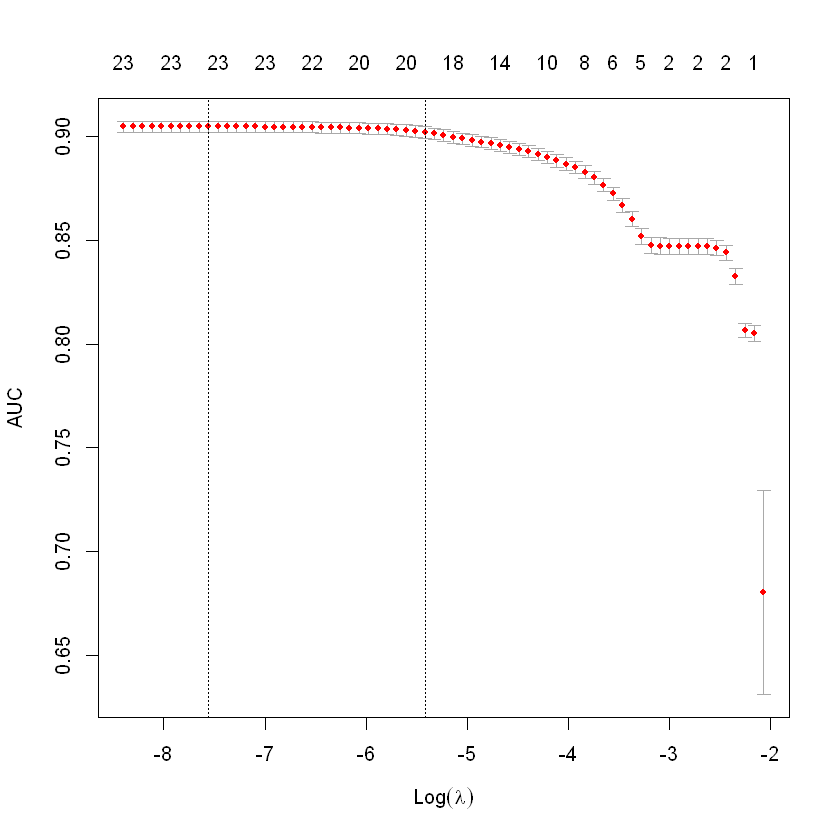

In [45]:
plot(glm.cvfit)

In [46]:
cat("As we seein the plot, AUC is maximised at log(lambda) = ",round(log(glm.cvfit$lambda.min),2))

As we seein the plot, AUC is maximised at log(lambda) =  -7.56

Below, the coefficients of our model show us that some dummy variables have been eliminated as expected.

In [47]:
coef(glm.cvfit)

25 x 1 sparse Matrix of class "dgCMatrix"
                                  1
(Intercept)             -3.87868044
(Intercept)              .         
log(feature_3 + 2)       3.00659852
log(feature_4 + 1)      -0.26324513
feature_11              -0.61784533
feature_13              -0.47427503
as.factor(feature_8)1   -0.13373609
as.factor(feature_8)2    0.08479656
as.factor(feature_9)1    .         
as.factor(feature_9)2    0.18982324
as.factor(feature_9)3    .         
as.factor(feature_14)1  -0.15818547
as.factor(feature_14)2   0.86045239
as.factor(feature_14)3   .         
as.factor(feature_14)4  -0.43081139
as.factor(feature_14)5  -0.33017725
as.factor(feature_14)6   0.18365728
as.factor(feature_14)7   1.96232885
as.factor(feature_14)8  -0.12065844
as.factor(feature_14)9  -0.23545948
as.factor(feature_14)10  1.23914716
as.factor(feature_14)11  0.93744238
as.factor(feature_15)1   .         
as.factor(feature_15)2   2.29563132
as.factor(feature_15)3  -0.20530999

Evaluate the result:

In [48]:
std_predict <- predict(glm.cvfit, newx = train_mat, s = "lambda.min",type = "class")
std_probability <- predict(glm.cvfit, newx = train_mat, s = "lambda.min", type = "response")


std_confusion_mat <- confusionMatrix(as.factor(std_predict), as.factor(train$labels), positive="1")
std_confusion_mat

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 23333  2024
         1   611  1158
                                          
               Accuracy : 0.9029          
                 95% CI : (0.8993, 0.9064)
    No Information Rate : 0.8827          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4191          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.36392         
            Specificity : 0.97448         
         Pos Pred Value : 0.65461         
         Neg Pred Value : 0.92018         
             Prevalence : 0.11730         
         Detection Rate : 0.04269         
   Detection Prevalence : 0.06521         
      Balanced Accuracy : 0.66920         
                                          
       'Positive' Class : 1               
                  

Our results show that the model is **90.3% accurate** however, our **Sensitivity (True Positive Rate) is low at 36%**, meaning we're only detecting 36% of our churn cases. We probably want to shift our threshold so that we can detect as many as possible.

Assume that the insurance company has specified that they want to detect 90% of churn cases, no matter the cost of accidentally chasing down false positives. By shifting the probability threshold, we can increase the sensitivity to 90%.

In [49]:
# threshold for adjusting sensitivity.
t <- 0.078 

# convert probabilities to predictions
predict_binary <- ifelse(std_probability > t, 1, 0)
CM <- confusionMatrix(as.factor(predict_binary), as.factor(train$labels), positive="1")
CM

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 18053   312
         1  5891  2870
                                          
               Accuracy : 0.7713          
                 95% CI : (0.7663, 0.7763)
    No Information Rate : 0.8827          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3726          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9019          
            Specificity : 0.7540          
         Pos Pred Value : 0.3276          
         Neg Pred Value : 0.9830          
             Prevalence : 0.1173          
         Detection Rate : 0.1058          
   Detection Prevalence : 0.3230          
      Balanced Accuracy : 0.8280          
                                          
       'Positive' Class : 1               
                  

The cost of setting the churn threshold so high is that our accuracy has dropped to 77% (although balanced accuracy is much improved at 82%) and the specificity to 75%, meaning that 25% of customers who do not plan to leave are predicted to do so. This could amount to a huge amount of work for a marketing team to reach out to so many customers, in which case you might refine that threshold a bit more depending on the preventative measures you wish to implement.

## 4.3 Second Model - Linear Discriminant Analysis<a class="anchor" name="DevLDA">

Fit the LDA model to all features:

In [50]:
fit.lda = lda(labels ~ ., data = train)
fit.lda

Call:
lda(labels ~ ., data = train)

Prior probabilities of groups:
        0         1 
0.8826956 0.1173044 

Group means:
    feature_0   feature_1   feature_2  feature_3   feature_4   feature_5
0 -0.01055885 -0.01687312  0.01452347 -0.1441421  0.02796778 -0.04315315
1  0.03761570  0.13836133 -0.07790341  1.0639063 -0.21085256  0.29960662
    feature_6 feature_7 feature_8 feature_9  feature_10 feature_11 feature_12
0 -0.04359262  4.292516  1.160750  1.206774 0.019044437  0.5768042 0.16764116
1  0.25041530  4.665933  1.240729  1.367065 0.009113765  0.3670647 0.09365179
  feature_13 feature_14 feature_15
0  0.6849733   5.541221   2.591338
1  0.2721559   5.304840   2.344123

Coefficients of linear discriminants:
                    LD1
feature_0   0.040904031
feature_1   0.052893029
feature_2  -0.030310505
feature_3   0.943193304
feature_4  -0.077309868
feature_5   0.346286763
feature_6   0.275782235
feature_7   0.004894059
feature_8   0.125733950
feature_9   0.132972701
feature_10 -0.1

In [51]:
pred.lda = predict(fit.lda, train)
confusionMatrix(pred.lda$class, train$labels, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 23227  2256
         1   717   926
                                          
               Accuracy : 0.8904          
                 95% CI : (0.8866, 0.8941)
    No Information Rate : 0.8827          
    P-Value [Acc > NIR] : 3.593e-05       
                                          
                  Kappa : 0.3303          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.29101         
            Specificity : 0.97006         
         Pos Pred Value : 0.56360         
         Neg Pred Value : 0.91147         
             Prevalence : 0.11730         
         Detection Rate : 0.03414         
   Detection Prevalence : 0.06057         
      Balanced Accuracy : 0.63053         
                                          
       'Positive' Class : 1               
                  

As we found with logistic regression, the lda model trained on all features makes a **biased prediction** towards the **majority label class**. As they are both linear models, we suspect the same features that were chosen by the **step function** will perform well on an LDA model. The features from step3 are used below:

In [52]:
fit.step3.lda <- lda(formula = labels ~ log(feature_3 + 2) + log(feature_4 + 1) + feature_11 + feature_13 + as.factor(feature_8) +
    as.factor(feature_9) + as.factor(feature_14) + as.factor(feature_15), family = binomial, data = train)

fit.step3.lda

Call:
lda(labels ~ log(feature_3 + 2) + log(feature_4 + 1) + feature_11 + 
    feature_13 + as.factor(feature_8) + as.factor(feature_9) + 
    as.factor(feature_14) + as.factor(feature_15), data = train, 
    family = binomial)

Prior probabilities of groups:
        0         1 
0.8826956 0.1173044 

Group means:
  log(feature_3 + 2) log(feature_4 + 1) feature_11 feature_13
0          0.5539135         -0.2236684  0.5768042  0.6849733
1          1.0176981         -0.4038181  0.3670647  0.2721559
  as.factor(feature_8)1 as.factor(feature_8)2 as.factor(feature_9)1
0             0.6159790             0.2723856             0.5178333
1             0.5229415             0.3588938             0.4569453
  as.factor(feature_9)2 as.factor(feature_9)3 as.factor(feature_14)1
0             0.2838289            0.04042766              0.1396174
1             0.3871779            0.04525456              0.1260214
  as.factor(feature_14)2 as.factor(feature_14)3 as.factor(feature_14)4
0            0.0

In [53]:
pred.lda = predict(fit.step3.lda, train)
confusionMatrix(pred.lda$class, train$labels, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 23097  1824
         1   847  1358
                                          
               Accuracy : 0.9015          
                 95% CI : (0.8979, 0.9051)
    No Information Rate : 0.8827          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4515          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.42678         
            Specificity : 0.96463         
         Pos Pred Value : 0.61587         
         Neg Pred Value : 0.92681         
             Prevalence : 0.11730         
         Detection Rate : 0.05006         
   Detection Prevalence : 0.08129         
      Balanced Accuracy : 0.69570         
                                          
       'Positive' Class : 1               
                  

The sensitivity of this model is better than the logit model (while it had unchanged probability threshold), but the down side of this model is that we cannot adjust the probabilities and choose to preference the minority label class.

## 5. Model Scoring on Test Data <a class="anchor" name="MScore">

Below we score the model on our test data using accuracy, sensitivity and specificity, as well as boostrap standard error for uncertainty.

## 5.1 Evaluation of Generalised Linear Model

Below our best outcome for a general linear model is shown at two probability thresholds.

In [54]:
std_predict <- predict(glm.cvfit, newx = test_mat, s = "lambda.min",type = "class")
std_probability <- predict(glm.cvfit, newx = test_mat, s = "lambda.min", type = "response")

# threshold at 0.5
cat("Performance metrics for predictions with default probability threshold at 0.5:")
confusionMatrix(as.factor(std_predict), as.factor(test$labels), positive="1")

# threshold for adjusting sensitivity.
t <- 0.076 

# convert probabilities to predictions
predict_binary <- ifelse(std_probability > t, 1, 0)

cat("Performance metrics for predictions with adjusted probability threshold at 0.084, to increase senseitivity to 90%:")
confusionMatrix(as.factor(predict_binary), as.factor(test$labels), positive="1")


Performance metrics for predictions with default probability threshold at 0.5:

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5838  500
         1  159  285
                                          
               Accuracy : 0.9028          
                 95% CI : (0.8955, 0.9098)
    No Information Rate : 0.8843          
    P-Value [Acc > NIR] : 5.381e-07       
                                          
                  Kappa : 0.4149          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.36306         
            Specificity : 0.97349         
         Pos Pred Value : 0.64189         
         Neg Pred Value : 0.92111         
             Prevalence : 0.11575         
         Detection Rate : 0.04202         
   Detection Prevalence : 0.06547         
      Balanced Accuracy : 0.66827         
                                          
       'Positive' Class : 1               
                        

Performance metrics for predictions with adjusted probability threshold at 0.084, to increase senseitivity to 90%:

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4477   76
         1 1520  709
                                          
               Accuracy : 0.7647          
                 95% CI : (0.7544, 0.7747)
    No Information Rate : 0.8843          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3611          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9032          
            Specificity : 0.7465          
         Pos Pred Value : 0.3181          
         Neg Pred Value : 0.9833          
             Prevalence : 0.1157          
         Detection Rate : 0.1045          
   Detection Prevalence : 0.3287          
      Balanced Accuracy : 0.8249          
                                          
       'Positive' Class : 1               
                        

### GLM Bootstrap error:

In [55]:
# boot function to recalculate the model based on each sample of the dataset
boot.fn <- function(data, index) {
    fit <- glm(formula = labels ~ log(feature_3 + 2) + log(feature_4 + 1) + feature_11 + feature_13 + as.factor(feature_8) +
    as.factor(feature_9) + as.factor(feature_14) + as.factor(feature_15), family = binomial, data = train, subset = index)
    return (coef(fit))
}

In [56]:
#  set the index for a sample
index <- sample(dim(train)[1], dim(train)[1] / 2)

Below we use the bootstrap function to estimate the standard error of our feature coefficients. It's a bit difficult to interpret because there are so many dummy variables, we'll provide an index of them below.

In [57]:
set.seed(1234)
myBootstrap<-boot(train, boot.fn, 1000)
myBootstrap


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = train, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias    std. error
t1*  -3.82206420  0.0001550054  0.15157035
t2*   3.30726851  0.0066620298  0.06526583
t3*  -0.35474907  0.0010815289  0.04865484
t4*  -0.78698635 -0.0080512107  0.06151141
t5*  -0.65896554 -0.0011652724  0.04845240
t6*  -0.21439437 -0.0018220369  0.07483212
t7*   0.09375067 -0.0025629204  0.07922197
t8*   0.17455802  0.0004604736  0.07803962
t9*   0.44677077 -0.0001494480  0.08439055
t10*  0.27081944 -0.0030043907  0.14176933
t11* -0.83460618 -0.0042316895  0.11662458
t12*  0.78935311 -0.0131068744  0.29648866
t13* -0.36244694 -0.0050007475  0.12216189
t14* -1.33573113 -0.0083085196  0.16332429
t15* -0.99772682 -0.0043098425  0.10886985
t16*  0.10249986 -0.0031451141  0.13447534
t17*  1.74516117 -0.0033918293  0.17544373
t18* -0.58491139 -0.0011354831  0.09612413
t19* -0.95367508 -0.0021605571  0.11672563
t20*  1.00058460 -0.002

Features in t12 has the highest uncertainty, this corresponds to feature feature_14 category_2.

Features in t2, t3 t4, t5 have the lowest uncertainty, these respectively correspond to:
- feature_3
- feature_4
- feature_11
- feature_13

See below to help us understand which row in the above statistics corresponds to which variable:

In [58]:
tibble::rowid_to_column(as.data.frame(colnames(train_mat)), "ID")

ID,colnames(train_mat)
<int>,<fct>
1,(Intercept)
2,log(feature_3 + 2)
3,log(feature_4 + 1)
4,feature_11
5,feature_13
6,as.factor(feature_8)1
7,as.factor(feature_8)2
8,as.factor(feature_9)1
9,as.factor(feature_9)2


## 5.2 Evaluation of Linear Disciminant Analysis Model

In [59]:
pred.lda = predict(fit.step3.lda, test)
confusionMatrix(pred.lda$class, test$labels, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5782  454
         1  215  331
                                         
               Accuracy : 0.9014         
                 95% CI : (0.894, 0.9084)
    No Information Rate : 0.8843         
    P-Value [Acc > NIR] : 3.753e-06      
                                         
                  Kappa : 0.4446         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.42166        
            Specificity : 0.96415        
         Pos Pred Value : 0.60623        
         Neg Pred Value : 0.92720        
             Prevalence : 0.11575        
         Detection Rate : 0.04881        
   Detection Prevalence : 0.08051        
      Balanced Accuracy : 0.69290        
                                         
       'Positive' Class : 1              
                                         

This model has a **higher sensitivity** than the final glm model with default probability threshold. The accuracy is a smidge lower but this is not a material difference. However, the fact that the glm model gives us the ability to shift the bar in order to manipulate the sensitivity score is an unquestionable advantage in a problem such as this. A marketing team might be able to devise a staged response to customers based on their risk level, those with the greatest probability of leaving may warrant greater intervention measures.

### LDA Bootstrap error
Redefine the boot function for lda.

In [60]:
boot.fn <- function(data, index) {
    fit <- lda(formula = labels ~ log(feature_3 + 2) + log(feature_4 + 1) + feature_11 + feature_13 + as.factor(feature_8) +
    as.factor(feature_9) + as.factor(feature_14) + as.factor(feature_15), family = binomial, data = train, subset = index)
    return (coef(fit))
}

Estimate bootstrap error:

In [61]:
myBootstrap<-boot(train, boot.fn, 1000)
myBootstrap


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = train, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias    std. error
t1*   2.12655462 -0.0030945375  0.03587594
t2*  -0.04783205  0.0003051808  0.01781525
t3*  -0.37579447  0.0014629635  0.02797130
t4*  -0.25044702  0.0004037174  0.01975007
t5*  -0.10036163  0.0010686944  0.03599078
t6*   0.05885736  0.0009478020  0.03958033
t7*   0.03885763 -0.0008607981  0.02953705
t8*   0.19611312 -0.0002622491  0.03510479
t9*   0.09511386 -0.0029170547  0.06186013
t10* -0.56380858 -0.0024444100  0.07238720
t11*  1.00160806  0.0084858498  0.29210337
t12* -0.24368863 -0.0034461956  0.08267755
t13* -0.76788010  0.0012698246  0.08515351
t14* -0.56026676 -0.0013078624  0.06680245
t15* -0.06283886 -0.0005732603  0.07668322
t16*  1.87839387  0.0073209980  0.19332453
t17* -0.35078391 -0.0015655579  0.06503386
t18* -0.53373256 -0.0011389856  0.06940129
t19*  1.08874182  0.0069921209  0.15843164
t20*  0.89922259  0.003

There's one less value in this as we no longer have an intercept for lda, so the feature names are offset by one from before.

Uncertainty in this model is very similar to the logistic regression model, although the LD1 coefficients are produced and scaled differently to the logit model, so perhaps they are not comparable in this way. Our features with highest uncertainty again appear to be in feature 14, our lowest uncertainty is in t4 (feature 4), accompanied by t2, t3 & t4. These correspond to features 4, 11 & 13. 

Index of feature names in bootstrap uncertainty table:

In [62]:
tibble::rowid_to_column(as.data.frame(colnames(train_mat)[-1]), "ID")

ID,colnames(train_mat)[-1]
<int>,<fct>
1,log(feature_3 + 2)
2,log(feature_4 + 1)
3,feature_11
4,feature_13
5,as.factor(feature_8)1
6,as.factor(feature_8)2
7,as.factor(feature_9)1
8,as.factor(feature_9)2
9,as.factor(feature_9)3


# 6. Best model selection

Below we compare the same glm model at two different probability thresholds against the LDA model. 't' indicates the probability threshold used on the GML model.

Bootstrap uncertainty in all models are very similar.

**Accuracy** of the LDA and GLM (t=0.5) were very similar:     
GLM (t=0.5) Accuracy : 0.90   
GLM (t=0.076) Accuracy : 0.76    
LDA Accuracy : 0.90    

**Sensitivity** is a very important parameter for this problem, GLM (t=0.076) is the stand out winner:     
GLM (t=0.5) Sensitivity : 0.36      
GLM (t=0.076) Sensitivity : 0.90    
LDA Sensitivity : 0.42      


**Specificity** GLM (t=0.5) is slightly ahead of LDA, while GLM (t=0.076) is poor:    
GLM (t=0.5) Specificity : 0.97   
GLM (t=0.076) Specificity : 0.75    
LDA Specificity : 0.96   

**Balanced accuracy** GLM (t=0.076) is far better than the other two:    
GLM (t=0.5) Balanced Accuracy : 0.67            
GLM (t=0.076) Balanced Accuracy : 0.82   
LDA Balanced Accuracy : 0.69    

The best model we have developed for this problem is the GLM model (glm.cvfit), the lda **lacks the flexibility** needed to get high enough sensitivity that churn customers won't slip through the gaps.

# 7. Model Interpretation and Inference<a class="anchor" name="MInterp">

The benefit of using linear models are their  interpretability. The feature coefficients allow us to infer the meaning of our models as they describe the change in log odds of churn occurring  for one every degree of change in each feature.

The log odds describes the probability of churn occurring, where the relationship is log(p/(1-p)), p=probability. So as the probability of an event occurring increases, so does the logit.

We can also factor in the uncertainty of the log odds from the previous section where calculated bootstrap error estimates on the coefficients.

The model coefficients:

In [63]:
coef(glm.cvfit)

25 x 1 sparse Matrix of class "dgCMatrix"
                                  1
(Intercept)             -3.87868044
(Intercept)              .         
log(feature_3 + 2)       3.00659852
log(feature_4 + 1)      -0.26324513
feature_11              -0.61784533
feature_13              -0.47427503
as.factor(feature_8)1   -0.13373609
as.factor(feature_8)2    0.08479656
as.factor(feature_9)1    .         
as.factor(feature_9)2    0.18982324
as.factor(feature_9)3    .         
as.factor(feature_14)1  -0.15818547
as.factor(feature_14)2   0.86045239
as.factor(feature_14)3   .         
as.factor(feature_14)4  -0.43081139
as.factor(feature_14)5  -0.33017725
as.factor(feature_14)6   0.18365728
as.factor(feature_14)7   1.96232885
as.factor(feature_14)8  -0.12065844
as.factor(feature_14)9  -0.23545948
as.factor(feature_14)10  1.23914716
as.factor(feature_14)11  0.93744238
as.factor(feature_15)1   .         
as.factor(feature_15)2   2.29563132
as.factor(feature_15)3  -0.20530999

The above coefficients tell us that our **strongest predictors**, as expected, are feature_3 with a coefficient of 2.98+/-0.07, and feature_15:category_2 with a coefficient of 2.29+/-0.11. They tell us that customers which rate more highly in feature 3 characteristics are more likely to churn, in fact, for every one degree of increase in feature 3 the log odds of the customers likelihood to churn will increase by 2.91 - 3.05. Additionally, customers who are present in category 2 of feature 15 are also more likely to churn, specifically the log odds of them churning is between 2.17 - 2.39 times higher than someone not in that category.

Similarly, customers who are present in feature_14 category_7 and category 10 have a high likelihood of churn.

On the other hand, the lowest coefficients are feature 11 & 13. For every degree increase in a customer’s standing within feature 11 & 13, their log odds of churning decreases by between 0.54-0.66 and 0.41-0.51 respectively.

## 7.1 Variable Importance <a class="anchor" name="VImp">

We look at shapely values to compare each variables importance in our model. Shapely values show us feature importance by assessing the increase in error after rearranging the model several times and provide the aggregate global feature importance (Raoniar, 2020). We'll discuss the final model and also compare it to our initial model that included all variables, to see how we did with feature selection.

Calculate shapely values for our model:

In [64]:
#glm.cvfit can't be used here, so we'll recreate it with glm
fit.glm.final <- glm(labels ~ log(feature_3 + 2) + log(feature_4 + 1) + feature_11 + feature_13 + 
    as.factor(feature_8) + as.factor(feature_9) + as.factor(feature_14) + as.factor(feature_15), data = test, family = binomial)


X <- train[-which(names(train) == "labels")] # label data
mod <- Predictor$new(fit.glm.final, data = X) # holding the machine learning model and the data

# Then we explain the first instance of the dataset with the Shapley method:
x.interest <- X[1, ]
shapley.glm.final <- Shapley$new(mod, x.interest = x.interest)

Plot the data:

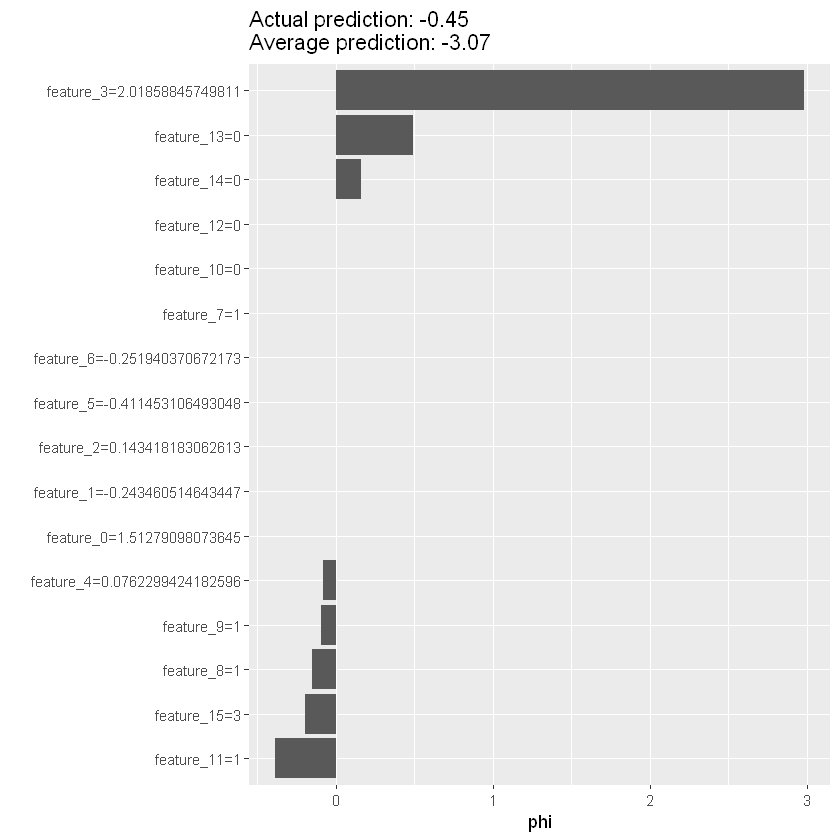

In [65]:
plot(shapley.glm.final)

As we have said from the start, feature 3 is our most important, followed by 13, 14 and 11.

Below we regenerate the original glm model, using all features but with dummy variables and log functions as we know they were the best form for those variables.

In [66]:
#glm.cvfit can't be used here, so we'll recreate it with glm
fit.glm.initial <- glm(labels ~ log(feature_1+4) + feature_2 + log(feature_3 + 2) + log(feature_4 + 1) + feature_5 + feature_6 + 
                     feature_7 + as.factor(feature_8) + as.factor(feature_9) + feature_10 + feature_11 + feature_12 + 
                     feature_13 +  as.factor(feature_14) + as.factor(feature_15), data = test, family = binomial)


X <- train[-which(names(train) == "labels")] # label data
mod <- Predictor$new(fit.glm.initial, data = X) # holding the machine learning model and the data

# Then we explain the first instance of the dataset with the Shapley method:
x.interest <- X[1, ]
shapley.glm.initial <- Shapley$new(mod, x.interest = x.interest)

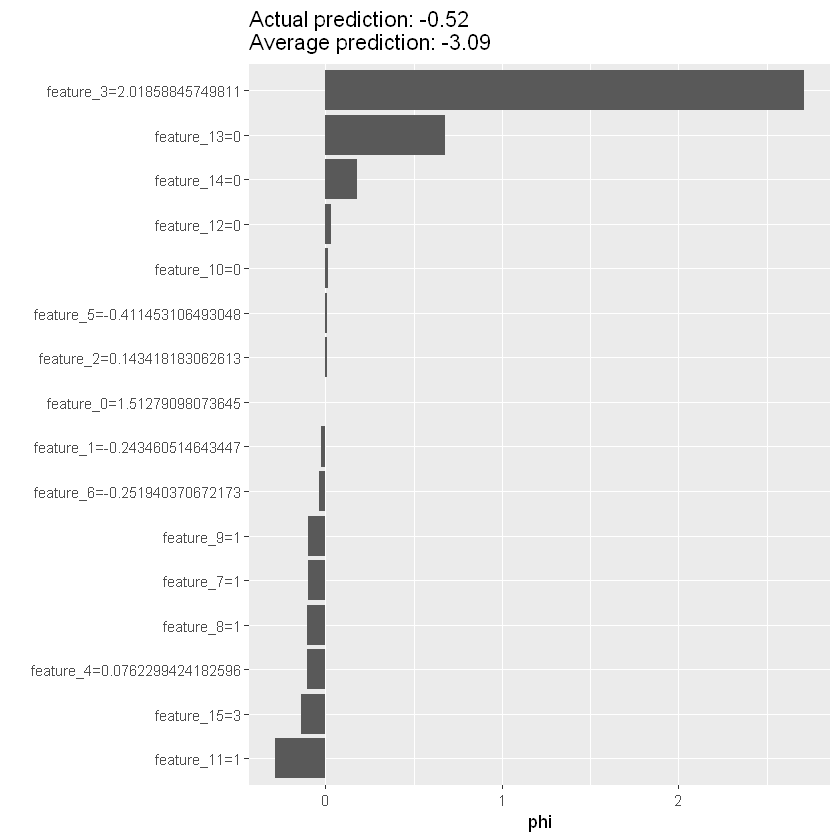

In [67]:
plot(shapley.glm.initial)

It seems our selection of features is in agreeance with the model containing all features. Those with the least importance have all been removed from our final model, such as feature 0, 1 & 10 in our first iteration, followed by further complexity reductions by elimination of 7, 6 12 and 5.

Perhaps for a less complex model, we might have improved things again by only including 3, 13, 14 & 11.

It's possible we misjudged the importance of feature 6, which we eliminated due to it's high multicollinearity with feature 5 & 15, the later of which was the one retained in the model. Feature 6 is ranked of higher importance than feature 15 and would have reduced the model complexity since feature 15 was split into three dummy variables.

## 7.2 Marketing Suggestions <a class="anchor" name="MarktSugst">

As our model has some inaccuracy when targeting customers who we suspect may leave, marketing teams should approach their customers differently depending on how high their risk of churn is.

If the probability threshold is set at 0.7, we are highly certain that any customers who are predicted to leave are going to do so, and therefore, more aggressive or expensive marketing strategies should consider for that cohort. There will still be ~1% of those predicted to leave who will be caught up unnecessarily in the marketing strategy, but this a small cost for potentially keeping the 20% of customers who are predicted to leave.

A second cohort should be considered for a softer marketing strategy. By reducing the probability threshold to 0.46 we can double the number of customers that are targeted because we expect may want to leave, however now 3% of happy customers will be caught up who may not want to be bothered by a marketing team. You don't want to bother happy customers with extra marketing too much, because then you might make them unhappy.

This can continue with as many cohorts as they want.

We might also suggest to the company that when marketing to new customers, they could have a more reliable customer base if they target the parameters we discussed in the inference section, such as if they have characteristics that align with low values of feature 3 they will be less likely to leave immediately.
This below can be used to test the thresholds suggested above:



This below can be used to test the thresholds suggested above:

In [68]:
std_probability <- predict(glm.cvfit, newx = test_mat, s = "lambda.min", type = "response")

# threshold for adjusting sensitivity.
#t <- 0.7
t <- 0.46

# convert probabilities to predictions
predict_binary <- ifelse(std_probability > t, 1, 0)

cat("Performance metrics for predictions with adjusted probability threshold at 0.084, to increase senseitivity to 90%:")
confusionMatrix(as.factor(predict_binary), as.factor(test$labels), positive="1")


Performance metrics for predictions with adjusted probability threshold at 0.084, to increase senseitivity to 90%:

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5815  471
         1  182  314
                                          
               Accuracy : 0.9037          
                 95% CI : (0.8964, 0.9106)
    No Information Rate : 0.8843          
    P-Value [Acc > NIR] : 1.552e-07       
                                          
                  Kappa : 0.4401          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.40000         
            Specificity : 0.96965         
         Pos Pred Value : 0.63306         
         Neg Pred Value : 0.92507         
             Prevalence : 0.11575         
         Detection Rate : 0.04630         
   Detection Prevalence : 0.07313         
      Balanced Accuracy : 0.68483         
                                          
       'Positive' Class : 1               
                        

# 8. Conclusion <a class="anchor" name="Conclusion">


### EDA
Many different graphical and statistical comparisons are made between one, two and three variables. It is immediately clear that feature 3 is significant. We suspect that features 7-15 may be best treated as if they are categoric. The distributions are analysed and significant imbalance is found the response variable.

### Model Development
First features are filtered out based on their multicollinearity and their low significance in the initial glm model, this resulted in the removal of features 5, 6, 7 & 10. Following this, the step function was used to iteratively reduce the AIC score and by removing features 0, 1 & 2 for their very low AIC scored contribution (with more time we would have confirmed the AIC uncertainty before assuming their AIC contribution was basically within the noise of the problem). Next it was found that the use of dummy variables on our suspected categoric features and logarithmic transforms on our highly skewed features was beneficial to the AIC as well. At the end, the model was still more complex than it should be for easy interpretation, however it was performing better and further reductions resulted in loss of accuracy or sensitivity.


### Model Scoring on Test Data
Models are scored on the test data by comparing their sensitivity, specificity, bootstrap standard error of coefficients and their flexibility. It was found that the logistic regression model's ability to flexibly adjust the probability threshold was a major advantage which would prevent customers from slipping through the gaps caused by low sensitivity.

### Model Interpretation and Inference
To interpret the model, the coefficients are compared along with their uncertainty. Feature_3 with a coefficient of 2.98+/-0.07 tells us that customers which rate more highly in feature 3 characteristics are more likely to churn and feature_15:category_2 with a coefficient of 2.29+/-0.11, meaning that customers who are present in category 2 of feature 15 are also more likely to churn.

On the other hand, the lowest coefficients are feature 11 & 13. For every degree increase in a customers standing within feature 11 & 13, their log odds of churning decreases by between 0.54-0.66 and 0.41-0.51 respectively.

### Variable Importance
In this section we use shapely values to compare out final model against the importance of all features from our initial model. Our findings here reinforce that good decisions were made with regard to feature selection. Feature 3 is a very strong feature along with 11, 13 & 14. This subset may have made a better simpler model had we continued to reduce the model complexity further. The weakest features, 0, 10 and 2 were all removed along with others.

### Marketing Suggestions
Marketing suggestion is made to approach different cohorts of customers with varying degrees of aggressiveness in marketing strategy based on the probability that they customer is going to leave.

# 9. References <a class="anchor" name="Ref"></a>

Raoniar, R. (September 26, 2020). Machine Learning Model Explanation using Shapley Values. https://onezero.blog/machine-learning-model-explanation-using-shapley-values/
